# Project: Investigate a Dataset (Gapminder World)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href ="#Functions">Functions</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Question 1">Question 1:Which is the most and least country in Murder rate?</a></li>
<li><a href="#Question 2">Question 2 : Which is the most and least country in Population?</a></li>
<li><a href="#Question 3">Question 3 : Which country has the most and least GDP Rate?</a></li>
<li><a href="#Question 4">Question 4 : Which country has the most and least Income Rate?</a></li>
<li><a href="#Question 5">Question 5 : Which country has the most and least Unemployment Rate?</a></li>
<li><a href="#Question 6">Question 6 : Does Unemployment rate have an effect on Murder rate?</a></li>
<li><a href="#Question 7">Question 7 : Does increase in Income rate will lead to decrease the Murder rate?</a></li>
<li><a href="#Question 8">Question 8: Does the increase in Population effect the Unemployment Rate?</a></li>
<li><a href="#Question 9">Question 9: Does the increase in Murder rate effect the Economy?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### We will explore these indicators in this data investigation ...
>Population rate ---> The human population explosion not only affects humans but also our environment and wildlife.As more population requires more resources, deforestation is happening at a faster rate which takes away the homes of these animals. Similarly, their habitat is being destroyed owing to human activities.the increased need calls for faster rates of industrialization. These industries pollute our water and lands, harming and degrading our quality of life.

>Crime Rate ---> Murder is the unlawful killing of another human without justification or valid excuse, especially the unlawful killing of another human with malice aforethought. , In this file we will explore the murder rate in the whole world .. To calculate the Murder ratio we have to divide the murder rate on the country population ...

>GDP Growth Rate ---> Economics is a social science devoted to the study of how people and societies get what they need and want. In this file , We will explore the world economic growth since 1990 till 2016 ...

>Unemployemnt rate ---->Unemployment is a very serious issue not only in India but in the whole world. There are hundreds and thousands of people out there who do not have employment.It will lead to an increase in poverty, an increase in crime rate, exploitation of labor, political instability, mental health, and loss of skills. As a result, all this will eventually lead to the demise of the nation.

> income rate for per person ---> For individuals and businesses, income generally means the value or amount that they receive for their labor and products.Individuals generally consider their gross income to equal the total of their earnings in the form of wages and salaries, the return on their investments and sales of property, and other receipts. Their net income is composed of their gross income reduced by costs incurred in producing the income.

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()
%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling

In [407]:
df_GDP = pd.read_csv("Project2/GDP_growth_rate.csv")
df_Murder = pd.read_csv("Project2/murder_total_deaths.csv")
df_Population = pd.read_csv("Project2/population_total.csv")
df_Income = pd.read_csv("Project2/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
df_Unemployment = pd.read_csv("Project2/Unemployment_rate.csv")

### Exploring the collected data ...

In [408]:
df_GDP.head()

Country  1960      1961      1962      1963      1964  \
0                        Aruba   NaN       NaN       NaN       NaN       NaN   
1  Africa Eastern and Southern   NaN       NaN       NaN       NaN       NaN   
2                  Afghanistan   NaN       NaN       NaN       NaN       NaN   
3   Africa Western and Central   NaN  1.848719  3.770212  7.272501  5.396356   
4                       Angola   NaN       NaN       NaN       NaN       NaN   

       1965      1966      1967      1968  ...      2011       2012      2013  \
0       NaN       NaN       NaN       NaN  ...  3.446055  -1.369863  4.198232   
1       NaN       NaN       NaN       NaN  ...  4.014183   1.972652  4.308370   
2       NaN       NaN       NaN       NaN  ...  0.426355  12.752287  5.600745   
3  4.049794 -1.787094 -9.546521  1.465741  ...  4.848351   5.142964  6.104241   
4       NaN       NaN       NaN       NaN  ...  3.471976   8.542188  4.954545   

       2014      2015      2016      2017      2018      2019      2020  
0  0.300000  5.700001  2.100000  1.999999       NaN       NaN       NaN  
1  3.986754  2.925591  2.019391  2.542298  2.475272  2.077898 -2.939186  
2  2.724543  1.451315  2.260314  2.647003  1.189228  3.911603 -2.351101  
3  5.927350  2.745937  0.127595  2.318042  2.952230  3.190336 -0.884981  
4  4.822628  0.943572 -2.580050 -0.147213 -2.003630 -0.624644 -5.399987  

[5 rows x 62 columns]

In [409]:
df_Murder.head()

country  1990  1991  1992  1993  1994  1995  1996  1997  1998  \
0           Afghanistan  2070  2200  2380  2600  2830  3020  3160  3270  3350   
1                Angola   527   532   543   569   598   608   582   582   667   
2               Albania   160   182   201   221   239   267   295   327   338   
3               Andorra  0.48  0.51  0.54  0.55  0.55  0.53  0.51   0.5  0.49   
4  United Arab Emirates  31.4  31.6  32.2  33.2  34.4  35.8  37.1  38.5  40.2   

   ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  ...  4910  4960  4990  4940  5020  5190  5560  5820  6060  6270  
1  ...   904   933   958   978   990  1010  1030  1050  1080  1090  
2  ...  82.7  77.5  67.5  68.4  68.5  68.5  68.7  68.9  69.2  69.5  
3  ...  0.52  0.52  0.53  0.54  0.54  0.54  0.55  0.55  0.55  0.55  
4  ...  81.7  94.9   109   122   129   132   133   133   133   132  

[5 rows x 28 columns]

In [410]:
df_Population.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2               Albania   400k   402k   404k   405k   407k   409k   411k   
3               Andorra   2650   2650   2650   2650   2650   2650   2650   
4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  3.28M  3.28M  ...  76.6M  76.4M  76.3M  76.1M    76M  75.8M  75.6M  75.4M   
1  1.57M  1.57M  ...   168M   170M   172M   175M   177M   179M   182M   184M   
2   413k   414k  ...  1.33M   1.3M  1.27M  1.25M  1.22M  1.19M  1.17M  1.14M   
3   2650   2650  ...    63k  62.9k  62.9k  62.8k  62.7k  62.7k  62.6k  62.5k   
4  40.2k  40.2k  ...  12.3M  12.4M  12.5M  12.5M  12.6M  12.7M  12.7M  12.8M   

    2099   2100  
0  75.2M  74.9M  
1   186M   188M  
2  1.11M  1.09M  
3  62.5k  62.4k  
4  12.8M  12.9M  

[5 rows x 302 columns]

In [411]:
df_Income.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan   674   674   674   674   674   674   674   674   674   
1                Angola   691   693   697   700   702   705   709   712   716   
2               Albania   746   746   746   746   746   747   747   747   747   
3               Andorra  1340  1340  1340  1350  1350  1350  1350  1360  1360   
4  United Arab Emirates  1120  1120  1120  1130  1130  1140  1140  1150  1150   

   ...   2041   2042   2043   2044   2045   2046   2047   2048   2049   2050  
0  ...   2880   2940   3000   3070   3130   3200   3270   3340   3410   3480  
1  ...   8040   8220   8390   8570   8750   8940   9120   9320   9520   9720  
2  ...  24.5k    25k  25.5k  26.1k  26.6k  27.2k  27.8k  28.3k  28.9k  29.6k  
3  ...   108k   111k   113k   116k   118k   121k   123k   126k   128k   131k  
4  ...  74.5k  76.1k  77.7k  79.3k    81k  82.7k  84.5k  86.3k  88.1k    90k  

[5 rows x 252 columns]

In [412]:
df_Unemployment.head()

Country  1960  1961  1962  1963  1964  1965  1966  \
0                        Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  Africa Eastern and Southern   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   Africa Western and Central   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1967  1968  ...       2011       2012       2013       2014       2015  \
0   NaN   NaN  ...        NaN        NaN        NaN        NaN        NaN   
1   NaN   NaN  ...   6.748081   6.562179   6.445456   6.405195   6.490041   
2   NaN   NaN  ...  11.054000  11.341000  11.193000  11.142000  11.127000   
3   NaN   NaN  ...   4.548376   4.637602   4.410216   4.688088   4.626737   
4   NaN   NaN  ...   7.360000   7.347000   7.366000   7.372000   7.392000   

        2016       2017       2018       2019       2020  
0        NaN        NaN        NaN        NaN        NaN  
1   6.610205   6.714955   6.731163   6.914353   7.563187  
2  11.158000  11.180000  11.152000  11.217000  11.710000  
3   5.567017   6.019505   6.041092   6.063362   6.774914  
4   7.412000   7.408000   7.421000   7.421000   8.333000  

[5 rows x 62 columns]

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

<a id='Functions'></a>
## Functions

#### This Function replace K , M , B With thousand , million , billion.. as numbers ....

In [414]:
def replacing(df):
    #First i replaced all K, M , B with empty space , Then i extracted all the K, M , B to its amount in numbers and multiply it in the number that had them..
    for values in df.columns[1:]:
        df[values] = df[values].replace(r'[kMB]+$', '', regex=True).astype(float) * df[values].str.extract(r'[\d\.]+([kMB]+)', expand=False).fillna(1).replace(['k','M',"B"], [10**3, 10**6, 10**9]).astype(int)
    
    return df

#### Droping all years except years from 1990 till 2016 ..

In [415]:
years = df_Income.columns[df_Income.columns.get_loc("1990"):df_Income.columns.get_loc("2016")+1]
def filtering_years(df):
    for year in df.columns:
        if year not in years and year not in ["country", "Country"]:
            df.drop(year, axis=1, inplace=True)
    
    return df

#### This function will return only the data in 2000, 2005, 2010 and 2016 , it will help me in visualizing my data since there are alot of years ...

In [416]:
ye2 = [2000 , 2005 , 2010 , 2016]
def Comparing(df):
    new_df = df[(df.index == "2000") | (df.index == "2005") | (df.index == "2010") | (df.index == "2016")]
            
    return new_df

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

### Data Cleaning ..

#### Checking for Nan Values in each data ..

In [417]:
sum(df_Population.isnull().sum())

0

In [418]:
sum(df_Income.isnull().sum())

0

In [419]:
sum(df_Murder.isnull().sum())

0

In [420]:
sum(df_GDP.isnull().sum())

4073

In [421]:
sum(df_Unemployment.isnull().sum())

9176

#### Removing NaN values from Unemployment and GDP dataframes..

In [422]:
df_GDP.fillna(0,inplace=True)

In [423]:
df_Unemployment.fillna(0, inplace=True)

#### Rechecking forr Nan Values ..

In [424]:
sum(df_GDP.isnull().sum())

0

In [425]:
sum(df_Unemployment.isnull().sum())

0

#### Droping all the other years except years from 1990 till 2016 ..

In [426]:
filtering_years(df_GDP)

Country      1990      1991      1992       1993  \
0                          Aruba  3.961402  7.962872  5.882353   7.307692   
1    Africa Eastern and Southern  0.050826 -0.095421 -2.343192  -1.089417   
2                    Afghanistan  0.000000  0.000000  0.000000   0.000000   
3     Africa Western and Central  6.562921  1.121069  2.693959  -1.160468   
4                         Angola -3.450099  0.991359 -5.838281 -23.983417   
..                           ...       ...       ...       ...        ...   
261                       Kosovo  0.000000  0.000000  0.000000   0.000000   
262                  Yemen, Rep.  0.000000  6.293494  8.207598   4.001966   
263                 South Africa -0.317786 -1.018220 -2.137057   1.233520   
264                       Zambia -0.481072 -0.036133 -1.730922   6.797274   
265                     Zimbabwe  6.988553  5.531782 -9.015570   1.051459   

         1994       1995       1996      1997      1998  ...       2007  \
0    8.203903   2.547144   1.185788  7.046874  1.991986  ...   1.800226   
1    2.051914   4.409975   5.570030  3.425412  1.789507  ...   6.857304   
2    0.000000   0.000000   0.000000  0.000000  0.000000  ...  13.826320   
3   -0.299641   1.927028   4.629048  4.234699  3.506516  ...   5.530987   
4    1.339363  15.000000  13.544370  7.274277  4.691146  ...  14.010018   
..        ...        ...        ...       ...       ...  ...        ...   
261  0.000000   0.000000   0.000000  0.000000  0.000000  ...   0.000000   
262  6.721949   5.669371   4.634967  5.231112  6.006695  ...   3.338428   
263  3.200000   3.100000   4.300000  2.600000  0.500000  ...   5.360474   
264 -8.625442   2.897669   6.218546  3.814007 -0.385746  ...   8.352436   
265  9.235199   0.158026  10.360697  2.680594  2.885212  ...  -3.653327   

          2008       2009       2010       2011       2012      2013  \
0    -0.090708 -10.519749  -3.685029   3.446055  -1.369863  4.198232   
1     4.572539   0.946811   5.152336   4.014183   1.972652  4.308370   
2     3.924984  21.390528  14.362441   0.426355  12.752287  5.600745   
3     6.279223   6.274463   6.957010   4.848351   5.142964  6.104241   
4    11.166138   0.858713   4.403933   3.471976   8.542188  4.954545   
..         ...        ...        ...        ...        ...       ...   
261   0.000000   5.034884   4.939924   6.319886   1.712195  5.340908   
262   3.647569   3.866230   7.702307 -12.714823   2.392886  4.823415   
263   3.191044  -1.538089   3.039733   3.168556   2.396232  2.485468   
264   7.773896   9.220348  10.298223   5.564602   7.597593  5.057232   
265 -17.668946  12.019560  19.675323  14.193913  16.665429  1.989493   

         2014       2015      2016  
0    0.300000   5.700001  2.100000  
1    3.986754   2.925591  2.019391  
2    2.724543   1.451315  2.260314  
3    5.927350   2.745937  0.127595  
4    4.822628   0.943572 -2.580050  
..        ...        ...       ...  
261  3.348804   5.916270  5.571757  
262 -0.188574 -27.994546 -9.375124  
263  1.413826   1.321862  0.664552  
264  4.697992   2.920375  3.776679  
265  2.376929   1.779873  0.755869  

[266 rows x 28 columns]

In [427]:
filtering_years(df_Unemployment)

Country  1990       1991       1992       1993  \
0                          Aruba   0.0   0.000000   0.000000   0.000000   
1    Africa Eastern and Southern   0.0   7.797012   7.838142   7.849445   
2                    Afghanistan   0.0  10.649000  10.821000  10.723000   
3     Africa Western and Central   0.0   4.415455   4.530574   4.546265   
4                         Angola   0.0   4.208000   4.208000   4.231000   
..                           ...   ...        ...        ...        ...   
261                       Kosovo   0.0   0.000000   0.000000   0.000000   
262                  Yemen, Rep.   0.0   8.318000   8.310000   8.355000   
263                 South Africa   0.0  29.955000  29.980000  29.922001   
264                       Zambia   0.0  18.900000  19.370001  19.700001   
265                     Zimbabwe   0.0   4.941000   4.993000   4.974000   

          1994       1995       1996       1997       1998  ...       2007  \
0     0.000000   0.000000   0.000000   0.000000   0.000000  ...   0.000000   
1     7.839701   7.833286   7.841857   7.858703   7.810903  ...   6.738765   
2    10.726000  11.179000  10.962000  10.783000  10.802000  ...  11.301000   
3     4.539152   4.525745   4.566774   4.602367   4.662650  ...   4.627661   
4     4.162000   4.114000   4.097000   4.088000   4.072000  ...   3.821000   
..         ...        ...        ...        ...        ...  ...        ...   
261   0.000000   0.000000   0.000000   0.000000   0.000000  ...   0.000000   
262   8.340000   8.964000   9.590000  10.201000  10.812000  ...  12.494000   
263  29.889000  29.893999  29.874001  29.907000  29.947001  ...  26.540001   
264  18.426001  16.806000  15.300000  13.644000  12.000000  ...  10.587000   
265   4.960000   5.633000   6.251000   6.930000   6.460000  ...   4.829000   

          2008       2009       2010       2011       2012       2013  \
0     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1     6.271977   6.323909   6.867786   6.748081   6.562179   6.445456   
2    11.093000  11.311000  11.352000  11.054000  11.341000  11.193000   
3     4.599393   4.583291   4.554662   4.548376   4.637602   4.410216   
4     3.793000   3.780000   9.430000   7.360000   7.347000   7.366000   
..         ...        ...        ...        ...        ...        ...   
261   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
262  12.621000  12.749000  12.831000  13.235000  13.167000  13.268000   
263  22.410000  23.520000  24.680000  24.639999  24.730000  24.559999   
264   7.930000  10.558000  13.190000  10.551000   7.850000   8.611000   
265   5.014000   5.083000   5.209000   5.370000   5.153000   4.982000   

          2014       2015       2016  
0     0.000000   0.000000   0.000000  
1     6.405195   6.490041   6.610205  
2    11.142000  11.127000  11.158000  
3     4.688088   4.626737   5.567017  
4     7.372000   7.392000   7.412000  
..         ...        ...        ...  
261   0.000000   0.000000   0.000000  
262  13.470000  13.770000  13.433000  
263  24.889999  25.150000  26.540001  
264   9.362000  10.125000  10.872000  
265   4.770000   4.778000   4.788000  

[266 rows x 28 columns]

In [428]:
filtering_years(df_Population)

country   1990   1991   1992   1993   1994   1995   1996  \
0             Afghanistan  12.4M  13.3M  14.5M  15.8M  17.1M  18.1M  18.9M   
1                  Angola  11.8M  12.2M  12.7M  13.1M  13.5M  13.9M  14.4M   
2                 Albania  3.29M  3.28M  3.25M   3.2M  3.15M  3.11M   3.1M   
3                 Andorra  54.5k  56.7k  58.9k    61k  62.7k  63.9k  64.4k   
4    United Arab Emirates  1.83M  1.94M  2.05M  2.17M  2.29M  2.42M  2.54M   
..                    ...    ...    ...    ...    ...    ...    ...    ...   
192                 Samoa   163k   164k   165k   167k   169k   170k   171k   
193                 Yemen  11.7M  12.3M    13M  13.6M  14.3M  14.9M  15.5M   
194          South Africa  36.8M  37.7M  38.7M  39.6M  40.6M  41.4M  42.2M   
195                Zambia  8.04M  8.25M  8.45M  8.66M  8.87M   9.1M  9.34M   
196              Zimbabwe  10.4M  10.7M  10.9M  11.1M  11.3M  11.4M  11.5M   

      1997   1998  ...   2007   2008   2009   2010   2011   2012   2013  \
0    19.4M  19.7M  ...  27.1M  27.7M  28.4M  29.2M  30.1M  31.2M  32.3M   
1    14.9M  15.4M  ...  20.9M  21.7M  22.5M  23.4M  24.2M  25.1M    26M   
2     3.1M  3.11M  ...  3.03M     3M  2.97M  2.95M  2.93M  2.91M   2.9M   
3    64.3k  64.1k  ...  82.7k  83.9k  84.5k  84.5k  83.7k  82.4k  80.8k   
4    2.67M  2.81M  ...  6.17M  7.09M  7.92M  8.55M  8.95M  9.14M   9.2M   
..     ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
192   172k   173k  ...   182k   183k   185k   186k   187k   189k   191k   
193    16M  16.5M  ...  21.3M  21.9M  22.5M  23.2M  23.8M  24.5M  25.1M   
194    43M  43.7M  ...  49.1M  49.8M  50.5M  51.2M    52M  52.8M  53.7M   
195   9.6M  9.87M  ...  12.5M  12.8M  13.2M  13.6M    14M  14.5M  14.9M   
196  11.7M  11.7M  ...  12.3M  12.4M  12.5M  12.7M  12.9M  13.1M  13.4M   

      2014   2015   2016  
0    33.4M  34.4M  35.4M  
1    26.9M  27.9M  28.8M  
2     2.9M  2.89M  2.89M  
3    79.2k    78k  77.3k  
4    9.21M  9.26M  9.36M  
..     ...    ...    ...  
192   192k   194k   195k  
193  25.8M  26.5M  27.2M  
194  54.5M  55.4M  56.2M  
195  15.4M  15.9M  16.4M  
196  13.6M  13.8M    14M  

[197 rows x 28 columns]

In [429]:
filtering_years(df_Murder)

country   1990   1991   1992   1993   1994   1995   1996  \
0             Afghanistan   2070   2200   2380   2600   2830   3020   3160   
1                  Angola    527    532    543    569    598    608    582   
2                 Albania    160    182    201    221    239    267    295   
3                 Andorra   0.48   0.51   0.54   0.55   0.55   0.53   0.51   
4    United Arab Emirates   31.4   31.6   32.2   33.2   34.4   35.8   37.1   
..                    ...    ...    ...    ...    ...    ...    ...    ...   
189                 Samoa   7.44   7.55   7.65   7.72   7.78   7.81   7.89   
190                 Yemen    356    373    393    414    433    450    465   
191          South Africa  17.2k  17.7k  18.3k  18.3k  18.6k  18.5k  18.8k   
192                Zambia    439    483    526    570    621    679    745   
193              Zimbabwe    617    564    564    576    607    679    713   

      1997   1998  ...   2007   2008   2009   2010   2011   2012   2013  \
0     3270   3350  ...   4910   4960   4990   4940   5020   5190   5560   
1      582    667  ...    904    933    958    978    990   1010   1030   
2      327    338  ...   82.7   77.5   67.5   68.4   68.5   68.5   68.7   
3      0.5   0.49  ...   0.52   0.52   0.53   0.54   0.54   0.54   0.55   
4     38.5   40.2  ...   81.7   94.9    109    122    129    132    133   
..     ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
189   7.97   8.01  ...   7.74   7.71   7.77   7.85   7.88   7.92   7.98   
190    479    493  ...    683    706    728    745    766    791    820   
191  19.8k  20.4k  ...  22.7k  21.6k  20.8k  20.1k  19.4k  18.6k  18.3k   
192    810    885  ...   1240   1280   1300   1330   1370   1380   1410   
193    787    893  ...   1320   1360   1390   1410   1440   1450   1490   

      2014   2015   2016  
0     5820   6060   6270  
1     1050   1080   1090  
2     68.9   69.2   69.5  
3     0.55   0.55   0.55  
4      133    133    132  
..     ...    ...    ...  
189   8.02   8.05   8.02  
190    844    876    906  
191  18.4k  18.8k  19.2k  
192   1430   1460   1500  
193   1540   1580   1650  

[194 rows x 28 columns]

In [430]:
filtering_years(df_Income)

country   1990   1991   1992   1993   1994   1995   1996  \
0             Afghanistan   1110   1010    971    665    493    728    690   
1                  Angola   1590   1650   1600   1240   1290   1520   1760   
2                 Albania   4840   3510   3280   3610   3930   4490   4930   
3                 Andorra  31.8k  31.3k  30.4k  29.1k    29k  29.2k  30.4k   
4    United Arab Emirates  51.1k  50.3k  50.3k  49.8k  52.8k  55.9k  58.3k   
..                    ...    ...    ...    ...    ...    ...    ...    ...   
190                 Samoa   4060   3940   3890   4010   3870   4100   4370   
191                 Yemen   4170   4210   4320   4270   4340   4400   4440   
192          South Africa  10.3k   9940   9490   9380   9450   9540   9760   
193                Zambia   2190   2130   2050   2130   1900   1910   1980   
194              Zimbabwe   3320   3430   3060   3030   3260   3230   3520   

      1997   1998  ...   2007   2008   2009   2010   2011   2012   2013  \
0      656    627  ...   1460   1480   1760   1960   1910   2080   2120   
1     1940   2080  ...   6920   7820   7750   7690   7680   8040   8140   
2     4420   4840  ...   9180   9940  10.3k  10.8k  11.1k  11.3k  11.4k   
3    33.2k  34.5k  ...  48.6k  46.3k  46.7k  43.6k  46.9k  46.9k  48.9k   
4    62.5k  62.5k  ...  76.6k  68.8k  58.4k  54.9k  56.1k  57.4k  59.9k   
..     ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
190   4370   4450  ...   6360   6380   6030   6010   6210   5910   5830   
191   4520   4650  ...   5190   5230   5280   5540   4700   4690   4790   
192   9840   9730  ...  12.4k  12.6k  12.3k  12.5k  12.7k  12.7k  12.9k   
193   2000   1930  ...   2620   2750   2920   3130   3200   3340   3400   
194   3580   3650  ...   2130   1740   1930   2270   2560   2930   2940   

      2014   2015   2016  
0     2100   2070   2060  
1     8240   8040   7570  
2    11.6k  11.9k  12.3k  
3    50.2k  52.1k  53.9k  
4    62.4k  65.2k  66.5k  
..     ...    ...    ...  
190   5790   6000   6450  
191   4660   3270   2880  
192  12.9k  12.8k  12.7k  
193   3450   3440   3470  
194   2960   2960   2940  

[195 rows x 28 columns]

#### Replacing K , M , B with numbers ...

In [431]:
replacing(df_Income)

country     1990     1991     1992     1993     1994  \
0             Afghanistan   1110.0   1010.0    971.0    665.0    493.0   
1                  Angola   1590.0   1650.0   1600.0   1240.0   1290.0   
2                 Albania   4840.0   3510.0   3280.0   3610.0   3930.0   
3                 Andorra  31800.0  31300.0  30400.0  29100.0  29000.0   
4    United Arab Emirates  51100.0  50300.0  50300.0  49800.0  52800.0   
..                    ...      ...      ...      ...      ...      ...   
190                 Samoa   4060.0   3940.0   3890.0   4010.0   3870.0   
191                 Yemen   4170.0   4210.0   4320.0   4270.0   4340.0   
192          South Africa  10300.0   9940.0   9490.0   9380.0   9450.0   
193                Zambia   2190.0   2130.0   2050.0   2130.0   1900.0   
194              Zimbabwe   3320.0   3430.0   3060.0   3030.0   3260.0   

        1995     1996     1997     1998  ...     2007     2008     2009  \
0      728.0    690.0    656.0    627.0  ...   1460.0   1480.0   1760.0   
1     1520.0   1760.0   1940.0   2080.0  ...   6920.0   7820.0   7750.0   
2     4490.0   4930.0   4420.0   4840.0  ...   9180.0   9940.0  10300.0   
3    29200.0  30400.0  33200.0  34500.0  ...  48600.0  46300.0  46700.0   
4    55900.0  58300.0  62500.0  62500.0  ...  76600.0  68800.0  58400.0   
..       ...      ...      ...      ...  ...      ...      ...      ...   
190   4100.0   4370.0   4370.0   4450.0  ...   6360.0   6380.0   6030.0   
191   4400.0   4440.0   4520.0   4650.0  ...   5190.0   5230.0   5280.0   
192   9540.0   9760.0   9840.0   9730.0  ...  12400.0  12600.0  12300.0   
193   1910.0   1980.0   2000.0   1930.0  ...   2620.0   2750.0   2920.0   
194   3230.0   3520.0   3580.0   3650.0  ...   2130.0   1740.0   1930.0   

        2010     2011     2012     2013     2014     2015     2016  
0     1960.0   1910.0   2080.0   2120.0   2100.0   2070.0   2060.0  
1     7690.0   7680.0   8040.0   8140.0   8240.0   8040.0   7570.0  
2    10800.0  11100.0  11300.0  11400.0  11600.0  11900.0  12300.0  
3    43600.0  46900.0  46900.0  48900.0  50200.0  52100.0  53900.0  
4    54900.0  56100.0  57400.0  59900.0  62400.0  65200.0  66500.0  
..       ...      ...      ...      ...      ...      ...      ...  
190   6010.0   6210.0   5910.0   5830.0   5790.0   6000.0   6450.0  
191   5540.0   4700.0   4690.0   4790.0   4660.0   3270.0   2880.0  
192  12500.0  12700.0  12700.0  12900.0  12900.0  12800.0  12700.0  
193   3130.0   3200.0   3340.0   3400.0   3450.0   3440.0   3470.0  
194   2270.0   2560.0   2930.0   2940.0   2960.0   2960.0   2940.0  

[195 rows x 28 columns]

In [432]:
replacing(df_Murder)

country      1990      1991      1992      1993      1994  \
0             Afghanistan   2070.00   2200.00   2380.00   2600.00   2830.00   
1                  Angola    527.00    532.00    543.00    569.00    598.00   
2                 Albania    160.00    182.00    201.00    221.00    239.00   
3                 Andorra      0.48      0.51      0.54      0.55      0.55   
4    United Arab Emirates     31.40     31.60     32.20     33.20     34.40   
..                    ...       ...       ...       ...       ...       ...   
189                 Samoa      7.44      7.55      7.65      7.72      7.78   
190                 Yemen    356.00    373.00    393.00    414.00    433.00   
191          South Africa  17200.00  17700.00  18300.00  18300.00  18600.00   
192                Zambia    439.00    483.00    526.00    570.00    621.00   
193              Zimbabwe    617.00    564.00    564.00    576.00    607.00   

         1995      1996      1997      1998  ...      2007      2008  \
0     3020.00   3160.00   3270.00   3350.00  ...   4910.00   4960.00   
1      608.00    582.00    582.00    667.00  ...    904.00    933.00   
2      267.00    295.00    327.00    338.00  ...     82.70     77.50   
3        0.53      0.51      0.50      0.49  ...      0.52      0.52   
4       35.80     37.10     38.50     40.20  ...     81.70     94.90   
..        ...       ...       ...       ...  ...       ...       ...   
189      7.81      7.89      7.97      8.01  ...      7.74      7.71   
190    450.00    465.00    479.00    493.00  ...    683.00    706.00   
191  18500.00  18800.00  19800.00  20400.00  ...  22700.00  21600.00   
192    679.00    745.00    810.00    885.00  ...   1240.00   1280.00   
193    679.00    713.00    787.00    893.00  ...   1320.00   1360.00   

         2009      2010      2011      2012      2013      2014      2015  \
0     4990.00   4940.00   5020.00   5190.00   5560.00   5820.00   6060.00   
1      958.00    978.00    990.00   1010.00   1030.00   1050.00   1080.00   
2       67.50     68.40     68.50     68.50     68.70     68.90     69.20   
3        0.53      0.54      0.54      0.54      0.55      0.55      0.55   
4      109.00    122.00    129.00    132.00    133.00    133.00    133.00   
..        ...       ...       ...       ...       ...       ...       ...   
189      7.77      7.85      7.88      7.92      7.98      8.02      8.05   
190    728.00    745.00    766.00    791.00    820.00    844.00    876.00   
191  20800.00  20100.00  19400.00  18600.00  18300.00  18400.00  18800.00   
192   1300.00   1330.00   1370.00   1380.00   1410.00   1430.00   1460.00   
193   1390.00   1410.00   1440.00   1450.00   1490.00   1540.00   1580.00   

         2016  
0     6270.00  
1     1090.00  
2       69.50  
3        0.55  
4      132.00  
..        ...  
189      8.02  
190    906.00  
191  19200.00  
192   1500.00  
193   1650.00  

[194 rows x 28 columns]

In [433]:
replacing(df_Population)

country        1990        1991        1992        1993  \
0             Afghanistan  12400000.0  13300000.0  14500000.0  15800000.0   
1                  Angola  11800000.0  12200000.0  12700000.0  13100000.0   
2                 Albania   3290000.0   3280000.0   3250000.0   3200000.0   
3                 Andorra     54500.0     56700.0     58900.0     61000.0   
4    United Arab Emirates   1830000.0   1940000.0   2050000.0   2170000.0   
..                    ...         ...         ...         ...         ...   
192                 Samoa    163000.0    164000.0    165000.0    167000.0   
193                 Yemen  11700000.0  12300000.0  13000000.0  13600000.0   
194          South Africa  36800000.0  37700000.0  38700000.0  39600000.0   
195                Zambia   8040000.0   8250000.0   8450000.0   8660000.0   
196              Zimbabwe  10400000.0  10700000.0  10900000.0  11100000.0   

           1994        1995        1996        1997        1998  ...  \
0    17100000.0  18100000.0  18900000.0  19400000.0  19700000.0  ...   
1    13500000.0  13900000.0  14400000.0  14900000.0  15400000.0  ...   
2     3150000.0   3110000.0   3100000.0   3100000.0   3110000.0  ...   
3       62700.0     63900.0     64400.0     64300.0     64100.0  ...   
4     2290000.0   2420000.0   2540000.0   2670000.0   2810000.0  ...   
..          ...         ...         ...         ...         ...  ...   
192    169000.0    170000.0    171000.0    172000.0    173000.0  ...   
193  14300000.0  14900000.0  15500000.0  16000000.0  16500000.0  ...   
194  40600000.0  41400000.0  42200000.0  43000000.0  43700000.0  ...   
195   8870000.0   9100000.0   9340000.0   9600000.0   9870000.0  ...   
196  11300000.0  11400000.0  11500000.0  11700000.0  11700000.0  ...   

           2007        2008        2009        2010        2011        2012  \
0    27100000.0  27700000.0  28400000.0  29200000.0  30100000.0  31200000.0   
1    20900000.0  21700000.0  22500000.0  23400000.0  24200000.0  25100000.0   
2     3030000.0   3000000.0   2970000.0   2950000.0   2930000.0   2910000.0   
3       82700.0     83900.0     84500.0     84500.0     83700.0     82400.0   
4     6170000.0   7090000.0   7920000.0   8550000.0   8950000.0   9140000.0   
..          ...         ...         ...         ...         ...         ...   
192    182000.0    183000.0    185000.0    186000.0    187000.0    189000.0   
193  21300000.0  21900000.0  22500000.0  23200000.0  23800000.0  24500000.0   
194  49100000.0  49800000.0  50500000.0  51200000.0  52000000.0  52800000.0   
195  12500000.0  12800000.0  13200000.0  13600000.0  14000000.0  14500000.0   
196  12300000.0  12400000.0  12500000.0  12700000.0  12900000.0  13100000.0   

           2013        2014        2015        2016  
0    32300000.0  33400000.0  34400000.0  35400000.0  
1    26000000.0  26900000.0  27900000.0  28800000.0  
2     2900000.0   2900000.0   2890000.0   2890000.0  
3       80800.0     79200.0     78000.0     77300.0  
4     9200000.0   9210000.0   9260000.0   9360000.0  
..          ...         ...         ...         ...  
192    191000.0    192000.0    194000.0    195000.0  
193  25100000.0  25800000.0  26500000.0  27200000.0  
194  53700000.0  54500000.0  55400000.0  56200000.0  
195  14900000.0  15400000.0  15900000.0  16400000.0  
196  13400000.0  13600000.0  13800000.0  14000000.0  

[197 rows x 28 columns]

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

## Joining Total murder data with population data to calculate the murder rate ...

#### Here i joined the total murder data to the right side of the population data and i marked its years by  adding _Murder_counts to them .. in order to be able to calculate the murder ratio .... Murder ratio = total murder / population * 100k per population ...

In [434]:
murder_ratio = df_Population.join(df_Murder,rsuffix="_Murder")

In [435]:
murder_ratio

country        1990        1991        1992        1993  \
0             Afghanistan  12400000.0  13300000.0  14500000.0  15800000.0   
1                  Angola  11800000.0  12200000.0  12700000.0  13100000.0   
2                 Albania   3290000.0   3280000.0   3250000.0   3200000.0   
3                 Andorra     54500.0     56700.0     58900.0     61000.0   
4    United Arab Emirates   1830000.0   1940000.0   2050000.0   2170000.0   
..                    ...         ...         ...         ...         ...   
192                 Samoa    163000.0    164000.0    165000.0    167000.0   
193                 Yemen  11700000.0  12300000.0  13000000.0  13600000.0   
194          South Africa  36800000.0  37700000.0  38700000.0  39600000.0   
195                Zambia   8040000.0   8250000.0   8450000.0   8660000.0   
196              Zimbabwe  10400000.0  10700000.0  10900000.0  11100000.0   

           1994        1995        1996        1997        1998  ...  \
0    17100000.0  18100000.0  18900000.0  19400000.0  19700000.0  ...   
1    13500000.0  13900000.0  14400000.0  14900000.0  15400000.0  ...   
2     3150000.0   3110000.0   3100000.0   3100000.0   3110000.0  ...   
3       62700.0     63900.0     64400.0     64300.0     64100.0  ...   
4     2290000.0   2420000.0   2540000.0   2670000.0   2810000.0  ...   
..          ...         ...         ...         ...         ...  ...   
192    169000.0    170000.0    171000.0    172000.0    173000.0  ...   
193  14300000.0  14900000.0  15500000.0  16000000.0  16500000.0  ...   
194  40600000.0  41400000.0  42200000.0  43000000.0  43700000.0  ...   
195   8870000.0   9100000.0   9340000.0   9600000.0   9870000.0  ...   
196  11300000.0  11400000.0  11500000.0  11700000.0  11700000.0  ...   

     2007_Murder  2008_Murder  2009_Murder  2010_Murder  2011_Murder  \
0        4910.00      4960.00      4990.00      4940.00      5020.00   
1         904.00       933.00       958.00       978.00       990.00   
2          82.70        77.50        67.50        68.40        68.50   
3           0.52         0.52         0.53         0.54         0.54   
4          81.70        94.90       109.00       122.00       129.00   
..           ...          ...          ...          ...          ...   
192      1240.00      1280.00      1300.00      1330.00      1370.00   
193      1320.00      1360.00      1390.00      1410.00      1440.00   
194          NaN          NaN          NaN          NaN          NaN   
195          NaN          NaN          NaN          NaN          NaN   
196          NaN          NaN          NaN          NaN          NaN   

     2012_Murder  2013_Murder  2014_Murder  2015_Murder  2016_Murder  
0        5190.00      5560.00      5820.00      6060.00      6270.00  
1        1010.00      1030.00      1050.00      1080.00      1090.00  
2          68.50        68.70        68.90        69.20        69.50  
3           0.54         0.55         0.55         0.55         0.55  
4         132.00       133.00       133.00       133.00       132.00  
..           ...          ...          ...          ...          ...  
192      1380.00      1410.00      1430.00      1460.00      1500.00  
193      1450.00      1490.00      1540.00      1580.00      1650.00  
194          NaN          NaN          NaN          NaN          NaN  
195          NaN          NaN          NaN          NaN          NaN  
196          NaN          NaN          NaN          NaN          NaN  

[197 rows x 56 columns]

In [436]:
# Checking the dimension of the murder ratio data... 
murder_ratio.shape

(197, 56)

In [437]:
#Putting the countries in the population data in population variable,  and putting the countries in the total murder data to the murder variable   ...
population = murder_ratio["country"].sort_values().values

In [438]:
murder = murder_ratio["country_Murder"].sort_values().values

In [439]:
population

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana'

In [440]:
murder

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guam'

In [441]:
# I used for loop to go through the countries in the population list , then if this country not in the countries murder list . i will remove it from the data ...
for country in population:
    if country not in murder:
        population[population != country]

# Using the countries in the total murder as an index for the data..
murder_ratio.set_index("country_Murder", inplace = True)

In [442]:
# removing the column that have population countries ...
murder_ratio.drop(columns="country",inplace=True)

In [443]:
#Reseting the index to use numbers instead of the Countries in the total murder ...
murder_ratio.reset_index(inplace=True)

In [444]:
# Getting the Years that have Murder_counts in it and seperate it from the population years...
murder_columns_list = murder_ratio.columns

murder_years = murder_ratio.columns[murder_columns_list.get_indexer(["1990_Murder"])[0]:]

population_years = murder_ratio.columns[1:murder_columns_list.get_indexer(["1990_Murder"])[0]]

In [445]:
population_years

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [446]:
# Comparing the length of two list to make sure that we have the same years ..
len(population_years)

27

In [447]:
len(murder_years)

27

In [448]:
# Getting the Murder ratio by dividing the total murder on the population number then multiplaying it with 100k to get it per 100k population ...Then i add the result in a new Columns and label them with the number of the year + Per 100k ..
for i in range(0,len(population_years)):
    murder_ratio["{}_Per 100k".format(population_years[i])] = (murder_ratio[murder_years[i]] / murder_ratio[population_years[i]]) * 100000

In [449]:
murder_ratio

country_Murder        1990        1991        1992        1993  \
0             Afghanistan  12400000.0  13300000.0  14500000.0  15800000.0   
1                  Angola  11800000.0  12200000.0  12700000.0  13100000.0   
2                 Albania   3290000.0   3280000.0   3250000.0   3200000.0   
3                 Andorra     54500.0     56700.0     58900.0     61000.0   
4    United Arab Emirates   1830000.0   1940000.0   2050000.0   2170000.0   
..                    ...         ...         ...         ...         ...   
192                Zambia    163000.0    164000.0    165000.0    167000.0   
193              Zimbabwe  11700000.0  12300000.0  13000000.0  13600000.0   
194                   NaN  36800000.0  37700000.0  38700000.0  39600000.0   
195                   NaN   8040000.0   8250000.0   8450000.0   8660000.0   
196                   NaN  10400000.0  10700000.0  10900000.0  11100000.0   

           1994        1995        1996        1997        1998  ...  \
0    17100000.0  18100000.0  18900000.0  19400000.0  19700000.0  ...   
1    13500000.0  13900000.0  14400000.0  14900000.0  15400000.0  ...   
2     3150000.0   3110000.0   3100000.0   3100000.0   3110000.0  ...   
3       62700.0     63900.0     64400.0     64300.0     64100.0  ...   
4     2290000.0   2420000.0   2540000.0   2670000.0   2810000.0  ...   
..          ...         ...         ...         ...         ...  ...   
192    169000.0    170000.0    171000.0    172000.0    173000.0  ...   
193  14300000.0  14900000.0  15500000.0  16000000.0  16500000.0  ...   
194  40600000.0  41400000.0  42200000.0  43000000.0  43700000.0  ...   
195   8870000.0   9100000.0   9340000.0   9600000.0   9870000.0  ...   
196  11300000.0  11400000.0  11500000.0  11700000.0  11700000.0  ...   

     2007_Per 100k  2008_Per 100k  2009_Per 100k  2010_Per 100k  \
0        18.118081      17.906137      17.570423      16.917808   
1         4.325359       4.299539       4.257778       4.179487   
2         2.729373       2.583333       2.272727       2.318644   
3         0.628779       0.619785       0.627219       0.639053   
4         1.324149       1.338505       1.376263       1.426901   
..             ...            ...            ...            ...   
192     681.318681     699.453552     702.702703     715.053763   
193       6.197183       6.210046       6.177778       6.077586   
194            NaN            NaN            NaN            NaN   
195            NaN            NaN            NaN            NaN   
196            NaN            NaN            NaN            NaN   

     2011_Per 100k  2012_Per 100k  2013_Per 100k  2014_Per 100k  \
0        16.677741      16.634615      17.213622      17.425150   
1         4.090909       4.023904       3.961538       3.903346   
2         2.337884       2.353952       2.368966       2.375862   
3         0.645161       0.655340       0.680693       0.694444   
4         1.441341       1.444201       1.445652       1.444083   
..             ...            ...            ...            ...   
192     732.620321     730.158730     738.219895     744.791667   
193       6.050420       5.918367       5.936255       5.968992   
194            NaN            NaN            NaN            NaN   
195            NaN            NaN            NaN            NaN   
196            NaN            NaN            NaN            NaN   

     2015_Per 100k  2016_Per 100k  
0        17.616279      17.711864  
1         3.870968       3.784722  
2         2.394464       2.404844  
3         0.705128       0.711514  
4         1.436285       1.410256  
..             ...            ...  
192     752.577320     769.230769  
193       5.962264       6.066176  
194            NaN            NaN  
195            NaN            NaN  
196            NaN            NaN  

[197 rows x 82 columns]

In [450]:
#Removing the other years coulmns that doesnt have Per 100k since we only need the raito..
for i in range(0,len(population_years)):
    murder_ratio.drop(population_years[i], axis=1,inplace=True)
    murder_ratio.drop(murder_years[i], axis=1,inplace=True)

In [451]:
murder_ratio

country_Murder  1990_Per 100k  1991_Per 100k  1992_Per 100k  \
0             Afghanistan      16.693548      16.541353      16.413793   
1                  Angola       4.466102       4.360656       4.275591   
2                 Albania       4.863222       5.548780       6.184615   
3                 Andorra       0.880734       0.899471       0.916808   
4    United Arab Emirates       1.715847       1.628866       1.570732   
..                    ...            ...            ...            ...   
192                Zambia     269.325153     294.512195     318.787879   
193              Zimbabwe       5.273504       4.585366       4.338462   
194                   NaN            NaN            NaN            NaN   
195                   NaN            NaN            NaN            NaN   
196                   NaN            NaN            NaN            NaN   

     1993_Per 100k  1994_Per 100k  1995_Per 100k  1996_Per 100k  \
0        16.455696      16.549708      16.685083      16.719577   
1         4.343511       4.429630       4.374101       4.041667   
2         6.906250       7.587302       8.585209       9.516129   
3         0.901639       0.877193       0.829421       0.791925   
4         1.529954       1.502183       1.479339       1.460630   
..             ...            ...            ...            ...   
192     341.317365     367.455621     399.411765     435.672515   
193       4.235294       4.244755       4.557047       4.600000   
194            NaN            NaN            NaN            NaN   
195            NaN            NaN            NaN            NaN   
196            NaN            NaN            NaN            NaN   

     1997_Per 100k  1998_Per 100k  ...  2007_Per 100k  2008_Per 100k  \
0        16.855670      17.005076  ...      18.118081      17.906137   
1         3.906040       4.331169  ...       4.325359       4.299539   
2        10.548387      10.868167  ...       2.729373       2.583333   
3         0.777605       0.764431  ...       0.628779       0.619785   
4         1.441948       1.430605  ...       1.324149       1.338505   
..             ...            ...  ...            ...            ...   
192     470.930233     511.560694  ...     681.318681     699.453552   
193       4.918750       5.412121  ...       6.197183       6.210046   
194            NaN            NaN  ...            NaN            NaN   
195            NaN            NaN  ...            NaN            NaN   
196            NaN            NaN  ...            NaN            NaN   

     2009_Per 100k  2010_Per 100k  2011_Per 100k  2012_Per 100k  \
0        17.570423      16.917808      16.677741      16.634615   
1         4.257778       4.179487       4.090909       4.023904   
2         2.272727       2.318644       2.337884       2.353952   
3         0.627219       0.639053       0.645161       0.655340   
4         1.376263       1.426901       1.441341       1.444201   
..             ...            ...            ...            ...   
192     702.702703     715.053763     732.620321     730.158730   
193       6.177778       6.077586       6.050420       5.918367   
194            NaN            NaN            NaN            NaN   
195            NaN            NaN            NaN            NaN   
196            NaN            NaN            NaN            NaN   

     2013_Per 100k  2014_Per 100k  2015_Per 100k  2016_Per 100k  
0        17.213622      17.425150      17.616279      17.711864  
1         3.961538       3.903346       3.870968       3.784722  
2         2.368966       2.375862       2.394464       2.404844  
3         0.680693       0.694444       0.705128       0.711514  
4         1.445652       1.444083       1.436285       1.410256  
..             ...            ...            ...            ...  
192     738.219895     744.791667     752.577320     769.230769  
193       5.936255       5.968992       5.962264       6.066176  
194            NaN            NaN            NaN     

In [452]:
# Changing country_Murder_counts to Country since this is the only column that have countries in it ....
murder_ratio.columns = murder_ratio.columns.str.replace(r'_[^_]*$', '',regex=True)
                        

In [453]:
murder_ratio

country        1990        1991        1992        1993  \
0             Afghanistan   16.693548   16.541353   16.413793   16.455696   
1                  Angola    4.466102    4.360656    4.275591    4.343511   
2                 Albania    4.863222    5.548780    6.184615    6.906250   
3                 Andorra    0.880734    0.899471    0.916808    0.901639   
4    United Arab Emirates    1.715847    1.628866    1.570732    1.529954   
..                    ...         ...         ...         ...         ...   
192                Zambia  269.325153  294.512195  318.787879  341.317365   
193              Zimbabwe    5.273504    4.585366    4.338462    4.235294   
194                   NaN         NaN         NaN         NaN         NaN   
195                   NaN         NaN         NaN         NaN         NaN   
196                   NaN         NaN         NaN         NaN         NaN   

           1994        1995        1996        1997        1998  ...  \
0     16.549708   16.685083   16.719577   16.855670   17.005076  ...   
1      4.429630    4.374101    4.041667    3.906040    4.331169  ...   
2      7.587302    8.585209    9.516129   10.548387   10.868167  ...   
3      0.877193    0.829421    0.791925    0.777605    0.764431  ...   
4      1.502183    1.479339    1.460630    1.441948    1.430605  ...   
..          ...         ...         ...         ...         ...  ...   
192  367.455621  399.411765  435.672515  470.930233  511.560694  ...   
193    4.244755    4.557047    4.600000    4.918750    5.412121  ...   
194         NaN         NaN         NaN         NaN         NaN  ...   
195         NaN         NaN         NaN         NaN         NaN  ...   
196         NaN         NaN         NaN         NaN         NaN  ...   

           2007        2008        2009        2010        2011        2012  \
0     18.118081   17.906137   17.570423   16.917808   16.677741   16.634615   
1      4.325359    4.299539    4.257778    4.179487    4.090909    4.023904   
2      2.729373    2.583333    2.272727    2.318644    2.337884    2.353952   
3      0.628779    0.619785    0.627219    0.639053    0.645161    0.655340   
4      1.324149    1.338505    1.376263    1.426901    1.441341    1.444201   
..          ...         ...         ...         ...         ...         ...   
192  681.318681  699.453552  702.702703  715.053763  732.620321  730.158730   
193    6.197183    6.210046    6.177778    6.077586    6.050420    5.918367   
194         NaN         NaN         NaN         NaN         NaN         NaN   
195         NaN         NaN         NaN         NaN         NaN         NaN   
196         NaN         NaN         NaN         NaN         NaN         NaN   

           2013        2014        2015        2016  
0     17.213622   17.425150   17.616279   17.711864  
1      3.961538    3.903346    3.870968    3.784722  
2      2.368966    2.375862    2.394464    2.404844  
3      0.680693    0.694444    0.705128    0.711514  
4      1.445652    1.444083    1.436285    1.410256  
..          ...         ...         ...         ...  
192  738.219895  744.791667  752.577320  769.230769  
193    5.936255    5.968992    5.962264    6.066176  
194         NaN         NaN         NaN         NaN  
195         NaN         NaN         NaN         NaN  
196         NaN         NaN         NaN         NaN  

[197 rows x 28 columns]

#### Removing NaN rows in The DataFrame...

In [454]:
murder_ratio = murder_ratio[0:194]

#### Checking if There is any NaN Values..

In [455]:
sum(murder_ratio.isnull().sum())

0

In [456]:
murder_ratio

country          1990          1991          1992  \
0             Afghanistan     16.693548     16.541353     16.413793   
1                  Angola      4.466102      4.360656      4.275591   
2                 Albania      4.863222      5.548780      6.184615   
3                 Andorra      0.880734      0.899471      0.916808   
4    United Arab Emirates      1.715847      1.628866      1.570732   
..                    ...           ...           ...           ...   
189                 Samoa      0.037959      0.037562      0.037136   
190                 Yemen      0.523529      0.537464      0.554302   
191          South Africa  11700.680272  11721.854305  11806.451613   
192                Zambia    269.325153    294.512195    318.787879   
193              Zimbabwe      5.273504      4.585366      4.338462   

             1993          1994          1995          1996          1997  \
0       16.455696     16.549708     16.685083     16.719577     16.855670   
1        4.343511      4.429630      4.374101      4.041667      3.906040   
2        6.906250      7.587302      8.585209      9.516129     10.548387   
3        0.901639      0.877193      0.829421      0.791925      0.777605   
4        1.529954      1.502183      1.479339      1.460630      1.441948   
..            ...           ...           ...           ...           ...   
189      0.036762      0.036186      0.035662      0.035223      0.034956   
190      0.572614      0.587517      0.600801      0.611038      0.621271   
191  11437.500000  11341.463415  11011.904762  10930.232558  11314.285714   
192    341.317365    367.455621    399.411765    435.672515    470.930233   
193      4.235294      4.244755      4.557047      4.600000      4.918750   

             1998  ...          2007         2008         2009         2010  \
0       17.005076  ...     18.118081    17.906137    17.570423    16.917808   
1        4.331169  ...      4.325359     4.299539     4.257778     4.179487   
2       10.868167  ...      2.729373     2.583333     2.272727     2.318644   
3        0.764431  ...      0.628779     0.619785     0.627219     0.639053   
4        1.430605  ...      1.324149     1.338505     1.376263     1.426901   
..            ...  ...           ...          ...          ...          ...   
189      0.034378  ...      0.028456     0.027935     0.027750     0.027641   
190      0.631242  ...      0.799766     0.819026     0.835821     0.846591   
191  11460.674157  ...  10365.296804  9600.000000  9043.478261  8516.949153   
192    511.560694  ...    681.318681   699.453552   702.702703   715.053763   
193      5.412121  ...      6.197183     6.210046     6.177778     6.077586   

            2011         2012         2013         2014         2015  \
0      16.677741    16.634615    17.213622    17.425150    17.616279   
1       4.090909     4.023904     3.961538     3.903346     3.870968   
2       2.337884     2.353952     2.368966     2.375862     2.394464   
3       0.645161     0.655340     0.680693     0.694444     0.705128   
4       1.441341     1.444201     1.445652     1.444083     1.436285   
..           ...          ...          ...          ...          ...   
189     0.027266     0.026939     0.026779     0.026733     0.026744   
190     0.861642     0.880846     0.903084     0.920393     0.944984   
191  7983.539095  7440.000000  7120.622568  6969.696970  6937.269373   
192   732.620321   730.158730   738.219895   744.791667   752.577320   
193     6.050420     5.918367     5.936255     5.968992     5.962264   

            2016  
0      17.711864  
1       3.784722  
2       2.404844  
3       0.711514  
4       1.410256  
..           ...  
189     0.026823  
190     0.967949  
191  6906.474820  
192   769.230769  
193     6.066176  

[194 rows x 28 columns]

In [457]:
# new_murder = countries(murder_ratio)

#### Making the Country column my indeces ...

In [458]:
murder_ratio.set_index("country", inplace = True)

In [459]:
murder_ratio = murder_ratio.T

In [460]:
murder_ratio.columns.rename(name="Years",inplace=True) # --> Renaming the country name to Years...

In [463]:
murder_ratio

Years  Afghanistan    Angola    Albania   Andorra  United Arab Emirates  \
1990     16.693548  4.466102   4.863222  0.880734              1.715847   
1991     16.541353  4.360656   5.548780  0.899471              1.628866   
1992     16.413793  4.275591   6.184615  0.916808              1.570732   
1993     16.455696  4.343511   6.906250  0.901639              1.529954   
1994     16.549708  4.429630   7.587302  0.877193              1.502183   
1995     16.685083  4.374101   8.585209  0.829421              1.479339   
1996     16.719577  4.041667   9.516129  0.791925              1.460630   
1997     16.855670  3.906040  10.548387  0.777605              1.441948   
1998     17.005076  4.331169  10.868167  0.764431              1.430605   
1999     17.079208  4.150943   9.903846  0.745342              1.417508   
2000     17.259615  4.097561   8.306709  0.718654              1.402556   
2001     17.546296  4.106509   7.156550  0.683507              1.418182   
2002     17.654867  4.108571   6.038339  0.642857              1.442529   
2003     18.185654  4.232044   4.967949  0.628415              1.433962   
2004     18.502024  4.351064   4.000000  0.642202              1.380835   
2005     18.482490  4.355670   3.055016  0.633714              1.372549   
2006     18.371212  4.358209   2.709150  0.629630              1.307547   
2007     18.118081  4.325359   2.729373  0.628779              1.324149   
2008     17.906137  4.299539   2.583333  0.619785              1.338505   
2009     17.570423  4.257778   2.272727  0.627219              1.376263   
2010     16.917808  4.179487   2.318644  0.639053              1.426901   
2011     16.677741  4.090909   2.337884  0.645161              1.441341   
2012     16.634615  4.023904   2.353952  0.655340              1.444201   
2013     17.213622  3.961538   2.368966  0.680693              1.445652   
2014     17.425150  3.903346   2.375862  0.694444              1.444083   
2015     17.616279  3.870968   2.394464  0.705128              1.436285   
2016     17.711864  3.784722   2.404844  0.711514              1.410256   

Years  Argentina   Armenia  American Samoa  Antigua and Barbuda  Australia  \
1990    6.012270  4.661017        4.944000             0.013000   4.702073   
1991    5.981873  5.299145        4.984227             0.013372   4.568855   
1992    6.059701  5.843023        4.961240             0.013851   4.444444   
1993    6.088235  6.547619        4.878419             0.014091   4.334601   
1994    6.191860  6.554878        4.836310             0.014663   4.301887   
1995    6.149425  6.366460        4.788937             0.015500   4.280350   
1996    6.193182  6.151420        4.772080             0.015440   4.226933   
1997    6.134454  5.591054        4.755927             0.015815   4.209215   
1998    6.094183  5.273312        4.631148             0.016452   4.203980   
1999    6.219178  4.983819        4.564926             0.017021   4.161491   
2000    6.368564  4.462541        4.644737             0.017000   4.089219   
2001    6.407507  4.229508        4.766839             0.018698   3.962963   
2002    6.419098  4.158416        4.853129             0.018711   3.862239   
2003    6.089239  4.105960        4.817150             0.019643   3.728606   
2004    5.792208  4.233333        4.694894             0.020503   3.576642   
2005    5.655527  4.395973        4.601227             0.022277   3.539394   
2006    5.674300  4.527027        4.437727             0.022488   3.606755   
2007    5.566751  4.539249        4.285714             0.023636   3.622142   
2008    5.685786  4.639175        4.180328             0.023286   3.681055   
2009    5.753086  4.567474        4.175317             0.023991   3.691756   
2010    5.843521  4.444444        4.193182             0.022207   3.662307   
2011    5.956416  4.375000        4.188130             0.021556   3.609467   
2012    6.076555  4.305556        4.214602             0.020917   3.576471   
2013    6.232227  4.068966 

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

### Working on the GDP Data ... 

#### Making the Country column my indeces ...

In [466]:
df_GDP.set_index("Country",inplace=True)

In [467]:
df_GDP

1990      1991      1992       1993  \
Country                                                                
Aruba                        3.961402  7.962872  5.882353   7.307692   
Africa Eastern and Southern  0.050826 -0.095421 -2.343192  -1.089417   
Afghanistan                  0.000000  0.000000  0.000000   0.000000   
Africa Western and Central   6.562921  1.121069  2.693959  -1.160468   
Angola                      -3.450099  0.991359 -5.838281 -23.983417   
...                               ...       ...       ...        ...   
Kosovo                       0.000000  0.000000  0.000000   0.000000   
Yemen, Rep.                  0.000000  6.293494  8.207598   4.001966   
South Africa                -0.317786 -1.018220 -2.137057   1.233520   
Zambia                      -0.481072 -0.036133 -1.730922   6.797274   
Zimbabwe                     6.988553  5.531782 -9.015570   1.051459   

                                 1994       1995       1996      1997  \
Country                                                                 
Aruba                        8.203903   2.547144   1.185788  7.046874   
Africa Eastern and Southern  2.051914   4.409975   5.570030  3.425412   
Afghanistan                  0.000000   0.000000   0.000000  0.000000   
Africa Western and Central  -0.299641   1.927028   4.629048  4.234699   
Angola                       1.339363  15.000000  13.544370  7.274277   
...                               ...        ...        ...       ...   
Kosovo                       0.000000   0.000000   0.000000  0.000000   
Yemen, Rep.                  6.721949   5.669371   4.634967  5.231112   
South Africa                 3.200000   3.100000   4.300000  2.600000   
Zambia                      -8.625442   2.897669   6.218546  3.814007   
Zimbabwe                     9.235199   0.158026  10.360697  2.680594   

                                 1998      1999  ...       2007       2008  \
Country                                          ...                         
Aruba                        1.991986  1.238042  ...   1.800226  -0.090708   
Africa Eastern and Southern  1.789507  2.603876  ...   6.857304   4.572539   
Afghanistan                  0.000000  0.000000  ...  13.826320   3.924984   
Africa Western and Central   3.506516  1.421036  ...   5.530987   6.279223   
Angola                       4.691146  2.181490  ...  14.010018  11.166138   
...                               ...       ...  ...        ...        ...   
Kosovo                       0.000000  0.000000  ...   0.000000   0.000000   
Yemen, Rep.                  6.006695  3.775530  ...   3.338428   3.647569   
South Africa                 0.500000  2.400000  ...   5.360474   3.191044   
Zambia                      -0.385746  4.650190  ...   8.352436   7.773896   
Zimbabwe                     2.885212 -0.817821  ...  -3.653327 -17.668946   

                                  2009       2010       2011       2012  \
Country                                                                   
Aruba                       -10.519749  -3.685029   3.446055  -1.369863   
Africa Eastern and Southern   0.946811   5.152336   4.014183   1.972652   
Afghanistan                  21.390528  14.362441   0.426355  12.752287   
Africa Western and Central    6.274463   6.957010   4.848351   5.142964   
Angola                        0.858713   4.403933   3.471976   8.542188   
...                                ...        ...        ...        ...   
Kosovo                        5.034884   4.939924   6.319886   1.712195   
Yemen, Rep.                   3.866230   7.702307 -12.714823   2.392886   
South Africa                 -1.538089   3.039733   3.168556   2.396232   
Zambia                        9.220348  10.298223   5.564602   7.597593   
Zimbabwe                     12.019560  19.675323  14.193913  16.665429   

                                 2013      2014       2015      2016  
Country                                                               
Aruba        

#### Transposing the columns with the indeces

In [468]:
df_GDP = df_GDP.T

In [469]:
df_GDP

Country      Aruba  Africa Eastern and Southern  Afghanistan  \
1990      3.961402                     0.050826     0.000000   
1991      7.962872                    -0.095421     0.000000   
1992      5.882353                    -2.343192     0.000000   
1993      7.307692                    -1.089417     0.000000   
1994      8.203903                     2.051914     0.000000   
1995      2.547144                     4.409975     0.000000   
1996      1.185788                     5.570030     0.000000   
1997      7.046874                     3.425412     0.000000   
1998      1.991986                     1.789507     0.000000   
1999      1.238042                     2.603876     0.000000   
2000      7.616588                     3.197143     0.000000   
2001     -2.971257                     3.526480     0.000000   
2002     -3.273646                     3.992607     0.000000   
2003      1.975547                     2.908004     8.832278   
2004      7.911563                     5.656582     1.414118   
2005      1.214349                     6.361804    11.229715   
2006      1.050608                     6.688755     5.357403   
2007      1.800226                     6.857304    13.826320   
2008     -0.090708                     4.572539     3.924984   
2009    -10.519749                     0.946811    21.390528   
2010     -3.685029                     5.152336    14.362441   
2011      3.446055                     4.014183     0.426355   
2012     -1.369863                     1.972652    12.752287   
2013      4.198232                     4.308370     5.600745   
2014      0.300000                     3.986754     2.724543   
2015      5.700001                     2.925591     1.451315   
2016      2.100000                     2.019391     2.260314   

Country  Africa Western and Central     Angola    Albania   Andorra  \
1990                       6.562921  -3.450099  -9.575640  3.781388   
1991                       1.121069   0.991359 -28.002142  2.546004   
1992                       2.693959  -5.838281  -7.187111  0.929214   
1993                      -1.160468 -23.983417   9.559412 -1.031484   
1994                      -0.299641   1.339363   8.302867  2.383182   
1995                       1.927028  15.000000  13.322333  2.757502   
1996                       4.629048  13.544370   9.099999  4.649739   
1997                       4.234699   7.274277 -10.919984  9.067672   
1998                       3.506516   4.691146   8.829424  3.194793   
1999                       1.421036   2.181490  12.890804  4.099079   
2000                       3.734635   3.054624   6.946217  3.528362   
2001                       5.212695   4.205999   8.293313  8.119358   
2002                       9.899591  13.665687   4.536524  4.546362   
2003                       5.518510   2.989850   5.528637  8.694204   
2004                       8.013486  10.952862   5.514668  8.135676   
2005                       5.848351  15.028915   5.526424  5.397796   
2006                       5.374463  11.547683   5.902659  4.808689   
2007                       5.530987  14.010018   5.983260  1.553188   
2008                       6.279223  11.166138   7.500041 -5.559186   
2009                       6.274463   0.858713   3.354289 -5.302847   
2010                       6.957010   4.403933   3.706938 -1.974958   
2011                       4.848351   3.471976   2.545406 -0.008070   
2012                       5.142964   8.542188   1.417243 -4.974444   
2013                       6.104241   4.954545   1.002018 -3.547597   
2014                       5.927350   4.822628   1.774449  2.504466   
2015                       2.745937   0.943572   2.218726  1.434140   
2016                       0.127595  -2.580050   3.314981  3.709678   

Country  Arab World  United Arab Emirates  Argentina  ...  \
1990      12.373098             18.327986  -2.467214  ...   
1991       2.337089              0.860082   9.133111  ...   
1992       5.163188              3.

In [470]:
df_GDP.columns.rename(name="Years",inplace=True) # --> Renaming the country name to Years...

In [473]:
df_GDP

Years      Aruba  Africa Eastern and Southern  Afghanistan  \
1990    3.961402                     0.050826     0.000000   
1991    7.962872                    -0.095421     0.000000   
1992    5.882353                    -2.343192     0.000000   
1993    7.307692                    -1.089417     0.000000   
1994    8.203903                     2.051914     0.000000   
1995    2.547144                     4.409975     0.000000   
1996    1.185788                     5.570030     0.000000   
1997    7.046874                     3.425412     0.000000   
1998    1.991986                     1.789507     0.000000   
1999    1.238042                     2.603876     0.000000   
2000    7.616588                     3.197143     0.000000   
2001   -2.971257                     3.526480     0.000000   
2002   -3.273646                     3.992607     0.000000   
2003    1.975547                     2.908004     8.832278   
2004    7.911563                     5.656582     1.414118   
2005    1.214349                     6.361804    11.229715   
2006    1.050608                     6.688755     5.357403   
2007    1.800226                     6.857304    13.826320   
2008   -0.090708                     4.572539     3.924984   
2009  -10.519749                     0.946811    21.390528   
2010   -3.685029                     5.152336    14.362441   
2011    3.446055                     4.014183     0.426355   
2012   -1.369863                     1.972652    12.752287   
2013    4.198232                     4.308370     5.600745   
2014    0.300000                     3.986754     2.724543   
2015    5.700001                     2.925591     1.451315   
2016    2.100000                     2.019391     2.260314   

Years  Africa Western and Central     Angola    Albania   Andorra  Arab World  \
1990                     6.562921  -3.450099  -9.575640  3.781388   12.373098   
1991                     1.121069   0.991359 -28.002142  2.546004    2.337089   
1992                     2.693959  -5.838281  -7.187111  0.929214    5.163188   
1993                    -1.160468 -23.983417   9.559412 -1.031484    3.141588   
1994                    -0.299641   1.339363   8.302867  2.383182    3.322772   
1995                     1.927028  15.000000  13.322333  2.757502    2.990042   
1996                     4.629048  13.544370   9.099999  4.649739    4.693627   
1997                     4.234699   7.274277 -10.919984  9.067672    4.323094   
1998                     3.506516   4.691146   8.829424  3.194793    5.148232   
1999                     1.421036   2.181490  12.890804  4.099079    1.809676   
2000                     3.734635   3.054624   6.946217  3.528362    6.599485   
2001                     5.212695   4.205999   8.293313  8.119358    1.684811   
2002                     9.899591  13.665687   4.536524  4.546362    0.605117   
2003                     5.518510   2.989850   5.528637  8.694204    4.713562   
2004                     8.013486  10.952862   5.514668  8.135676    9.004155   
2005                     5.848351  15.028915   5.526424  5.397796    5.415001   
2006                     5.374463  11.547683   5.902659  4.808689    6.065760   
2007                     5.530987  14.010018   5.983260  1.553188    4.524154   
2008                     6.279223  11.166138   7.500041 -5.559186    5.773995   
2009                     6.274463   0.858713   3.354289 -5.302847    0.643073   
2010                     6.957010   4.403933   3.706938 -1.974958    4.776624   
2011                     4.848351   3.471976   2.545406 -0.008070    3.806778   
2012                     5.142964   8.542188   1.417243 -4.974444    5.041890   
2013                     6.104241   4.954545   1.002018 -3.547597    2.965049   
2014                     5.927350   4.822628   1.774449  2.504466    2.557937   
2015                     2.745937   0.943572   2.218726  1.434140    3.002276   
2016                     0.127595  -2.580050   3.314981  3.709678    3.20003

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

### Working on the Income Data ... 

In [476]:
df_Income.set_index("country",inplace=True) # Making the Country column my indeces ...

In [477]:
df_Income

1990     1991     1992     1993     1994     1995  \
country                                                                      
Afghanistan            1110.0   1010.0    971.0    665.0    493.0    728.0   
Angola                 1590.0   1650.0   1600.0   1240.0   1290.0   1520.0   
Albania                4840.0   3510.0   3280.0   3610.0   3930.0   4490.0   
Andorra               31800.0  31300.0  30400.0  29100.0  29000.0  29200.0   
United Arab Emirates  51100.0  50300.0  50300.0  49800.0  52800.0  55900.0   
...                       ...      ...      ...      ...      ...      ...   
Samoa                  4060.0   3940.0   3890.0   4010.0   3870.0   4100.0   
Yemen                  4170.0   4210.0   4320.0   4270.0   4340.0   4400.0   
South Africa          10300.0   9940.0   9490.0   9380.0   9450.0   9540.0   
Zambia                 2190.0   2130.0   2050.0   2130.0   1900.0   1910.0   
Zimbabwe               3320.0   3430.0   3060.0   3030.0   3260.0   3230.0   

                         1996     1997     1998     1999  ...     2007  \
country                                                   ...            
Afghanistan             690.0    656.0    627.0    597.0  ...   1460.0   
Angola                 1760.0   1940.0   2080.0   2190.0  ...   6920.0   
Albania                4930.0   4420.0   4840.0   5490.0  ...   9180.0   
Andorra               30400.0  33200.0  34500.0  35700.0  ...  48600.0   
United Arab Emirates  58300.0  62500.0  62500.0  64300.0  ...  76600.0   
...                       ...      ...      ...      ...  ...      ...   
Samoa                  4370.0   4370.0   4450.0   4520.0  ...   6360.0   
Yemen                  4440.0   4520.0   4650.0   4690.0  ...   5190.0   
South Africa           9760.0   9840.0   9730.0   9820.0  ...  12400.0   
Zambia                 1980.0   2000.0   1930.0   1970.0  ...   2620.0   
Zimbabwe               3520.0   3580.0   3650.0   3600.0  ...   2130.0   

                         2008     2009     2010     2011     2012     2013  \
country                                                                      
Afghanistan            1480.0   1760.0   1960.0   1910.0   2080.0   2120.0   
Angola                 7820.0   7750.0   7690.0   7680.0   8040.0   8140.0   
Albania                9940.0  10300.0  10800.0  11100.0  11300.0  11400.0   
Andorra               46300.0  46700.0  43600.0  46900.0  46900.0  48900.0   
United Arab Emirates  68800.0  58400.0  54900.0  56100.0  57400.0  59900.0   
...                       ...      ...      ...      ...      ...      ...   
Samoa                  6380.0   6030.0   6010.0   6210.0   5910.0   5830.0   
Yemen                  5230.0   5280.0   5540.0   4700.0   4690.0   4790.0   
South Africa          12600.0  12300.0  12500.0  12700.0  12700.0  12900.0   
Zambia                 2750.0   2920.0   3130.0   3200.0   3340.0   3400.0   
Zimbabwe               1740.0   1930.0   2270.0   2560.0   2930.0   2940.0   

                         2014     2015     2016  
country                                          
Afghanistan            2100.0   2070.0   2060.0  
Angola                 8240.0   8040.0   7570.0  
Albania               11600.0  11900.0  12300.0  
Andorra               50200.0  52100.0  53900.0  
United Arab Emirates  62400.0  65200.0  66500.0  
...                       ...      ...      ...  
Samoa                  5790.0   6000.0   6450.0  
Yemen                  4660.0   3270.0   2880.0  
South Africa          12900.0  12800.0  12700.0  
Zambia                 3450.0   3440.0   3470.0  
Zimbabwe               2960.0   2960.0   2940.0  

[195 rows x 27 columns]

In [478]:
df_Income = df_Income.T # Transposing the columns with the indeces

In [479]:
df_Income

country  Afghanistan  Angola  Albania  Andorra  United Arab Emirates  \
1990          1110.0  1590.0   4840.0  31800.0               51100.0   
1991          1010.0  1650.0   3510.0  31300.0               50300.0   
1992           971.0  1600.0   3280.0  30400.0               50300.0   
1993           665.0  1240.0   3610.0  29100.0               49800.0   
1994           493.0  1290.0   3930.0  29000.0               52800.0   
1995           728.0  1520.0   4490.0  29200.0               55900.0   
1996           690.0  1760.0   4930.0  30400.0               58300.0   
1997           656.0  1940.0   4420.0  33200.0               62500.0   
1998           627.0  2080.0   4840.0  34500.0               62500.0   
1999           597.0  2190.0   5490.0  35700.0               64300.0   
2000           578.0  2320.0   5910.0  35400.0               71200.0   
2001           563.0  2490.0   6460.0  35500.0               71800.0   
2002          1190.0  2900.0   6780.0  35600.0               73000.0   
2003          1240.0  3120.0   7180.0  38600.0               78100.0   
2004          1200.0  3520.0   7610.0  40600.0               82000.0   
2005          1290.0  4270.0   8070.0  44500.0               80200.0   
2006          1320.0  5560.0   8600.0  47800.0               86400.0   
2007          1460.0  6920.0   9180.0  48600.0               76600.0   
2008          1480.0  7820.0   9940.0  46300.0               68800.0   
2009          1760.0  7750.0  10300.0  46700.0               58400.0   
2010          1960.0  7690.0  10800.0  43600.0               54900.0   
2011          1910.0  7680.0  11100.0  46900.0               56100.0   
2012          2080.0  8040.0  11300.0  46900.0               57400.0   
2013          2120.0  8140.0  11400.0  48900.0               59900.0   
2014          2100.0  8240.0  11600.0  50200.0               62400.0   
2015          2070.0  8040.0  11900.0  52100.0               65200.0   
2016          2060.0  7570.0  12300.0  53900.0               66500.0   

country  Argentina  Armenia  Antigua and Barbuda  Australia  Austria  ...  \
1990       14100.0   5180.0              15500.0    31200.0  37600.0  ...   
1991       15200.0   4620.0              15600.0    30600.0  38500.0  ...   
1992       16200.0   2740.0              15500.0    30400.0  38800.0  ...   
1993       17300.0   2550.0              16000.0    31300.0  38700.0  ...   
1994       18100.0   2760.0              16700.0    32200.0  39500.0  ...   
1995       17400.0   3010.0              15600.0    33000.0  40500.0  ...   
1996       18100.0   3230.0              16300.0    33900.0  41400.0  ...   
1997       19300.0   3380.0              16800.0    34800.0  42200.0  ...   
1998       19900.0   3650.0              17300.0    36100.0  43700.0  ...   
1999       19000.0   3800.0              17600.0    37500.0  45100.0  ...   
2000       18600.0   4050.0              18300.0    38500.0  46600.0  ...   
2001       17600.0   4460.0              17200.0    38700.0  47000.0  ...   
2002       15500.0   5080.0              17100.0    39700.0  47500.0  ...   
2003       16700.0   5820.0              18000.0    40400.0  47700.0  ...   
2004       18000.0   6470.0              18700.0    41600.0  48700.0  ...   
2005       19400.0   7420.0              19700.0    42300.0  49500.0  ...   
2006       20800.0   8460.0              21900.0    42900.0  50900.0  ...   
2007       22400.0   9710.0              23500.0    44300.0  52700.0  ...   
2008       23100.0  10500.0              23100.0    45000.0  53300.0  ...   
2009       21500.0   9050.0              20000.0    44900.0  51100.0  ...   
2010       23500.0   9290.0              18200.0    45100.0  51900.0  ...   
2011       24600.0   9730.0              17600.0    45600.0  53300.0  ...   
2012       24100.0  10400.0              18000.0    46600.0  53400.0  ...   
2013       24400.0  10700.0              17600.0    47000.0  53100.0  ...   
2014       23600.0  11000.0              18100.0    47400.

In [480]:
df_Income.columns.rename(name="Years",inplace=True)

In [547]:
df_Income

Years  Afghanistan  Angola  Albania  Andorra  United Arab Emirates  Argentina  \
1990        1110.0  1590.0   4840.0  31800.0               51100.0    14100.0   
1991        1010.0  1650.0   3510.0  31300.0               50300.0    15200.0   
1992         971.0  1600.0   3280.0  30400.0               50300.0    16200.0   
1993         665.0  1240.0   3610.0  29100.0               49800.0    17300.0   
1994         493.0  1290.0   3930.0  29000.0               52800.0    18100.0   
1995         728.0  1520.0   4490.0  29200.0               55900.0    17400.0   
1996         690.0  1760.0   4930.0  30400.0               58300.0    18100.0   
1997         656.0  1940.0   4420.0  33200.0               62500.0    19300.0   
1998         627.0  2080.0   4840.0  34500.0               62500.0    19900.0   
1999         597.0  2190.0   5490.0  35700.0               64300.0    19000.0   
2000         578.0  2320.0   5910.0  35400.0               71200.0    18600.0   
2001         563.0  2490.0   6460.0  35500.0               71800.0    17600.0   
2002        1190.0  2900.0   6780.0  35600.0               73000.0    15500.0   
2003        1240.0  3120.0   7180.0  38600.0               78100.0    16700.0   
2004        1200.0  3520.0   7610.0  40600.0               82000.0    18000.0   
2005        1290.0  4270.0   8070.0  44500.0               80200.0    19400.0   
2006        1320.0  5560.0   8600.0  47800.0               86400.0    20800.0   
2007        1460.0  6920.0   9180.0  48600.0               76600.0    22400.0   
2008        1480.0  7820.0   9940.0  46300.0               68800.0    23100.0   
2009        1760.0  7750.0  10300.0  46700.0               58400.0    21500.0   
2010        1960.0  7690.0  10800.0  43600.0               54900.0    23500.0   
2011        1910.0  7680.0  11100.0  46900.0               56100.0    24600.0   
2012        2080.0  8040.0  11300.0  46900.0               57400.0    24100.0   
2013        2120.0  8140.0  11400.0  48900.0               59900.0    24400.0   
2014        2100.0  8240.0  11600.0  50200.0               62400.0    23600.0   
2015        2070.0  8040.0  11900.0  52100.0               65200.0    23900.0   
2016        2060.0  7570.0  12300.0  53900.0               66500.0    23200.0   

Years  Armenia  Antigua and Barbuda  Australia  Austria  ...  Uzbekistan  \
1990    5180.0              15500.0    31200.0  37600.0  ...      3420.0   
1991    4620.0              15600.0    30600.0  38500.0  ...      3330.0   
1992    2740.0              15500.0    30400.0  38800.0  ...      2890.0   
1993    2550.0              16000.0    31300.0  38700.0  ...      2760.0   
1994    2760.0              16700.0    32200.0  39500.0  ...      2560.0   
1995    3010.0              15600.0    33000.0  40500.0  ...      2490.0   
1996    3230.0              16300.0    33900.0  41400.0  ...      2490.0   
1997    3380.0              16800.0    34800.0  42200.0  ...      2570.0   
1998    3650.0              17300.0    36100.0  43700.0  ...      2640.0   
1999    3800.0              17600.0    37500.0  45100.0  ...      2720.0   
2000    4050.0              18300.0    38500.0  46600.0  ...      2790.0   
2001    4460.0              17200.0    38700.0  47000.0  ...      2870.0   
2002    5080.0              17100.0    39700.0  47500.0  ...      2940.0   
2003    5820.0              18000.0    40400.0  47700.0  ...      3030.0   
2004    6470.0              18700.0    41600.0  48700.0  ...      3220.0   
2005    7420.0              19700.0    42300.0  49500.0  ...      3410.0   
2006    8460.0              21900.0    42900.0  50900.0  ...      3620.0   
2007    9710.0              23500.0    44300.0  52700.0  ...      3900.0   
2008   10500.0              23100.0    45000.0  53300.0  ...      4190.0   
2009    9050.0              20000.0    44900.0  51100.0  ...      4450.0   
2010    9290.0              18200.0    45100.0  51900.0  ...      4650.0   
2011    9730.0              17600.0    45600.0  53300.0  ..

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###


### Working on UnEmployment Dataframe ...

In [486]:
df_Unemployment.set_index("Country",inplace=True)

In [487]:
df_Unemployment = df_Unemployment.T

In [488]:
df_Unemployment.columns.rename(name="Years",inplace=True)

In [491]:
df_Unemployment

Years  Aruba  Africa Eastern and Southern  Afghanistan  \
1990     0.0                     0.000000        0.000   
1991     0.0                     7.797012       10.649   
1992     0.0                     7.838142       10.821   
1993     0.0                     7.849445       10.723   
1994     0.0                     7.839701       10.726   
1995     0.0                     7.833286       11.179   
1996     0.0                     7.841857       10.962   
1997     0.0                     7.858703       10.783   
1998     0.0                     7.810903       10.802   
1999     0.0                     7.789680       10.809   
2000     0.0                     7.724844       10.806   
2001     0.0                     7.732945       10.809   
2002     0.0                     7.959582       11.257   
2003     0.0                     7.787965       11.141   
2004     0.0                     7.310328       10.988   
2005     0.0                     7.117658       11.217   
2006     0.0                     6.989477       11.099   
2007     0.0                     6.738765       11.301   
2008     0.0                     6.271977       11.093   
2009     0.0                     6.323909       11.311   
2010     0.0                     6.867786       11.352   
2011     0.0                     6.748081       11.054   
2012     0.0                     6.562179       11.341   
2013     0.0                     6.445456       11.193   
2014     0.0                     6.405195       11.142   
2015     0.0                     6.490041       11.127   
2016     0.0                     6.610205       11.158   

Years  Africa Western and Central  Angola    Albania  Andorra  Arab World  \
1990                     0.000000   0.000   0.000000      0.0    0.000000   
1991                     4.415455   4.208  10.307000      0.0   11.624660   
1992                     4.530574   4.208  30.014999      0.0   12.123597   
1993                     4.546265   4.231  25.257999      0.0   12.859821   
1994                     4.539152   4.162  20.840000      0.0   12.949263   
1995                     4.525745   4.114  14.611000      0.0   13.317197   
1996                     4.566774   4.097  13.931000      0.0   12.382483   
1997                     4.602367   4.088  16.875999      0.0   11.948039   
1998                     4.662650   4.072  20.047001      0.0   11.969959   
1999                     4.863700   4.055  20.840000      0.0   12.109096   
2000                     4.921423   4.030  19.028000      0.0   12.596101   
2001                     4.865752   4.004  18.575001      0.0   12.469380   
2002                     4.781385   3.961  17.895000      0.0   12.465001   
2003                     4.751168   3.958  16.989000      0.0   12.390521   
2004                     4.731880   3.916  16.309999      0.0   11.352673   
2005                     4.727947   3.882  15.970000      0.0   11.195937   
2006                     4.648872   3.858  15.630000      0.0   10.425838   
2007                     4.627661   3.821  15.970000      0.0   10.027224   
2008                     4.599393   3.793  13.060000      0.0    9.724742   
2009                     4.583291   3.780  13.670000      0.0    9.329220   
2010                     4.554662   9.430  14.090000      0.0    9.400912   
2011                     4.548376   7.360  13.480000      0.0   10.476673   
2012                     4.637602   7.347  13.380000      0.0   10.663129   
2013                     4.410216   7.366  15.870000      0.0   10.735393   
2014                     4.688088   7.372  18.049999      0.0   10.872227   
2015                     4.626737   7.392  17.190001      0.0   10.965901   
2016                     5.567017   7.412  15.420000      0.0   10.761115   

Years  United Arab Emirates  Argentina  ...  Virgin Islands (U.S.)  Vietnam  \
1990                  0.000   0.000000  ...                  0.000    0.000   
1991                  1.866   5.440000  ...                 

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###


In [492]:
df_Population.set_index("country", inplace = True)

In [493]:
df_Population = df_Population.T

In [494]:
df_Population.columns.rename(name="Years",inplace=True)

In [497]:
df_Population

Years  Afghanistan      Angola    Albania  Andorra  United Arab Emirates  \
1990    12400000.0  11800000.0  3290000.0  54500.0             1830000.0   
1991    13300000.0  12200000.0  3280000.0  56700.0             1940000.0   
1992    14500000.0  12700000.0  3250000.0  58900.0             2050000.0   
1993    15800000.0  13100000.0  3200000.0  61000.0             2170000.0   
1994    17100000.0  13500000.0  3150000.0  62700.0             2290000.0   
1995    18100000.0  13900000.0  3110000.0  63900.0             2420000.0   
1996    18900000.0  14400000.0  3100000.0  64400.0             2540000.0   
1997    19400000.0  14900000.0  3100000.0  64300.0             2670000.0   
1998    19700000.0  15400000.0  3110000.0  64100.0             2810000.0   
1999    20200000.0  15900000.0  3120000.0  64400.0             2970000.0   
2000    20800000.0  16400000.0  3130000.0  65400.0             3130000.0   
2001    21600000.0  16900000.0  3130000.0  67300.0             3300000.0   
2002    22600000.0  17500000.0  3130000.0  70000.0             3480000.0   
2003    23700000.0  18100000.0  3120000.0  73200.0             3710000.0   
2004    24700000.0  18800000.0  3100000.0  76300.0             4070000.0   
2005    25700000.0  19400000.0  3090000.0  78900.0             4590000.0   
2006    26400000.0  20100000.0  3060000.0  81000.0             5300000.0   
2007    27100000.0  20900000.0  3030000.0  82700.0             6170000.0   
2008    27700000.0  21700000.0  3000000.0  83900.0             7090000.0   
2009    28400000.0  22500000.0  2970000.0  84500.0             7920000.0   
2010    29200000.0  23400000.0  2950000.0  84500.0             8550000.0   
2011    30100000.0  24200000.0  2930000.0  83700.0             8950000.0   
2012    31200000.0  25100000.0  2910000.0  82400.0             9140000.0   
2013    32300000.0  26000000.0  2900000.0  80800.0             9200000.0   
2014    33400000.0  26900000.0  2900000.0  79200.0             9210000.0   
2015    34400000.0  27900000.0  2890000.0  78000.0             9260000.0   
2016    35400000.0  28800000.0  2890000.0  77300.0             9360000.0   

Years   Argentina    Armenia  Antigua and Barbuda   Australia    Austria  ...  \
1990   32600000.0  3540000.0              62500.0  17000000.0  7720000.0  ...   
1991   33100000.0  3510000.0              63400.0  17200000.0  7770000.0  ...   
1992   33500000.0  3440000.0              64500.0  17400000.0  7830000.0  ...   
1993   34000000.0  3360000.0              65800.0  17600000.0  7890000.0  ...   
1994   34400000.0  3280000.0              67200.0  17800000.0  7950000.0  ...   
1995   34800000.0  3220000.0              68700.0  18000000.0  7990000.0  ...   
1996   35200000.0  3170000.0              70200.0  18200000.0  8020000.0  ...   
1997   35700000.0  3130000.0              71700.0  18400000.0  8030000.0  ...   
1998   36100000.0  3110000.0              73200.0  18600000.0  8040000.0  ...   
1999   36500000.0  3090000.0              74700.0  18800000.0  8050000.0  ...   
2000   36900000.0  3070000.0              76000.0  19000000.0  8070000.0  ...   
2001   37300000.0  3050000.0              77200.0  19200000.0  8100000.0  ...   
2002   37700000.0  3030000.0              78300.0  19400000.0  8130000.0  ...   
2003   38100000.0  3020000.0              79300.0  19600000.0  8180000.0  ...   
2004   38500000.0  3000000.0              80300.0  19900000.0  8220000.0  ...   
2005   38900000.0  2980000.0              81500.0  20200000.0  8250000.0  ...   
2006   39300000.0  2960000.0              82700.0  20500000.0  8290000.0  ...   
2007   39700000.0  2930000.0              84000.0  20900000.0  8310000.0  ...   
2008   40100000.0  2910000.0              85400.0  21300000.0  8340000.0  ...   
2009   40500000.0  2890000.0              86700.0  21800000.0  8370000.0  ...   
2010   40900000.0  2880000.0              88000.0  22200000.0  8410000.0  ...   
2011   41300000.0  2880000.0              89300.0  22500000.0  8450000.0  ...   
2012   4

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###


<a id='eda'></a>
## Exploratory Data Analysis

#### I Found it hard to compare the data bcz its big ... So i decided to visualize few countries alone like (Russia , Egypt , Afghanistan, China, Japan, and United States ..

   ### ----------------------------------------------------------------------------------------------- #

## Murder Rate Data ..

### Egypt 

<IPython.core.display.Javascript object>


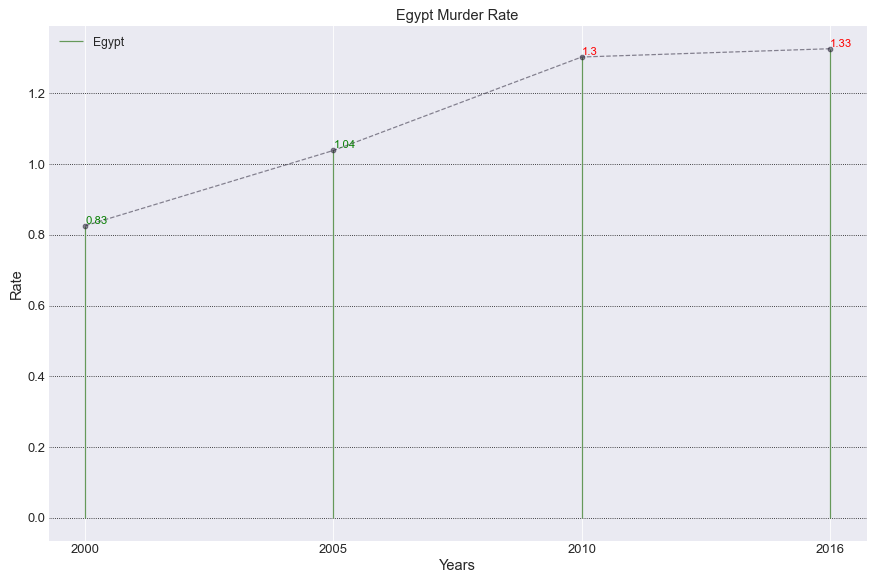

In [498]:
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_Egypt_Murder.index, ymin=0, ymax=comparing_Egypt_Murder.values,label='Egypt',color="#66995A")
for x, y in zip(comparing_Egypt_Murder.index, comparing_Egypt_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'red' if y > 1.2 else '#098003', 'size':14})
plt.plot(comparing_Egypt_Murder.index, comparing_Egypt_Murder.values,'o--', color='#1A1429', alpha=0.5)
# Decorations    
# plt.yticks(df.index, df.cars, fontsize=12)
# plt.xlim(-2.5, 2.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("Egypt Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper left",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [499]:
Average_Egypt_Murder = (0.83 + 1.04 + 1.3 + 1.33)/ 4
Average_Egypt_Murder

1.125

#### As we can see from the chart that murder rate in Egypt increases with an average of 1.125 every 5 Years ....

#### Exploring more details ..

In [500]:
murder_ratio.Egypt.describe()

count    27.000000
mean      1.029824
std       0.218151
min       0.798995
25%       0.818540
50%       0.953052
75%       1.301601
max       1.326180
Name: Egypt, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Japan 

<IPython.core.display.Javascript object>


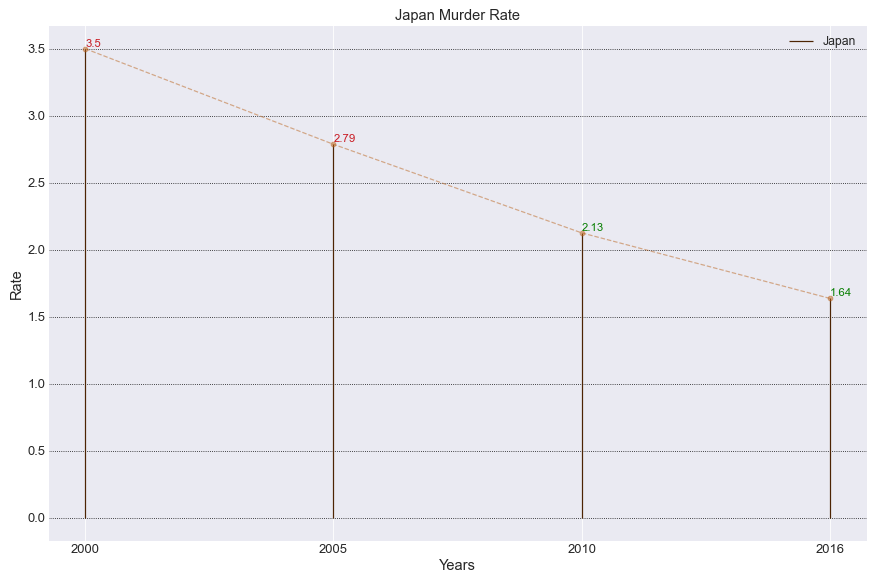

In [501]:
comparing_Japan_Murder = Comparing(murder_ratio.Japan)
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_Japan_Murder.index, ymin=0, ymax=comparing_Japan_Murder.values,label='Japan',color="#4D2403")
for x, y in zip(comparing_Japan_Murder.index, comparing_Japan_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#c91a22' if y > 2.5 else '#098003', 'size':14})
plt.plot(comparing_Japan_Murder.index, comparing_Japan_Murder.values,'o--', color='#BA631C', alpha=0.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("Japan Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper right",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [502]:
Average_Japan_Murder = (3.5 + 2.79 + 2.13 + 1.64)/ 4
Average_Japan_Murder

2.515

#### As we can see from the chart that murder rate in Japan decreases with an average of 2.515 every 5 Years ....

#### Exploring more details ..

In [503]:
murder_ratio.Japan.describe()

count    27.000000
mean      3.084479
std       1.011557
min       1.637475
25%       2.182900
50%       3.083573
75%       3.845321
max       4.894515
Name: Japan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Russia 

<IPython.core.display.Javascript object>


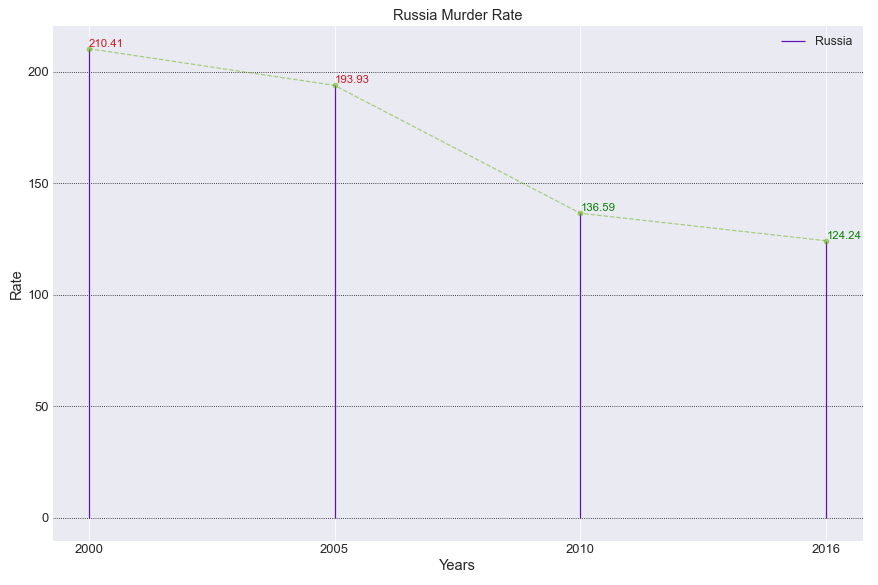

In [504]:
comparing_Russia_Murder = Comparing(murder_ratio.Russia)
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_Russia_Murder.index, ymin=0, ymax=comparing_Russia_Murder.values,label='Russia',color="#6010BB")
for x, y in zip(comparing_Russia_Murder.index, comparing_Russia_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#c91a22' if y > 150 else '#098003', 'size':14})
plt.plot(comparing_Russia_Murder.index, comparing_Russia_Murder.values,'o--', color='#63B00C', alpha=0.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("Russia Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper right",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [505]:
Average_Russia_Murder = (210.41 + 193.93 + 136.59 + 124.24)/ 4
Average_Russia_Murder

166.29250000000002

#### As we can see from the chart that murder rate in Russia increases with an average of 166.292 every 5 Years ....

#### Exploring more details ..

In [506]:
murder_ratio.Russia.describe()

count     27.000000
mean     168.081397
std       38.555582
min      108.085106
25%      126.653232
50%      175.471698
75%      203.425224
max      223.478261
Name: Russia, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Afghanistan 

<IPython.core.display.Javascript object>


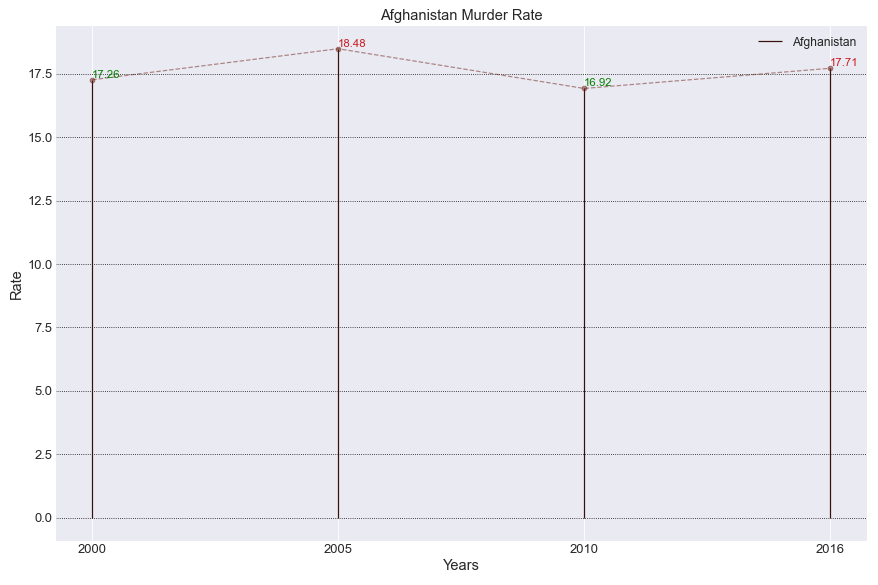

In [507]:
comparing_Afghanistan_Murder = Comparing(murder_ratio.Afghanistan)
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_Afghanistan_Murder.index, ymin=0, ymax=comparing_Afghanistan_Murder.values,label='Afghanistan',color="#36110A")
for x, y in zip(comparing_Afghanistan_Murder.index, comparing_Afghanistan_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#c91a22' if y > 17.26 else '#098003', 'size':14})
plt.plot(comparing_Afghanistan_Murder.index, comparing_Afghanistan_Murder.values,'o--', color='#6B1F15', alpha=0.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("Afghanistan Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper right",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [508]:
Average_Afghanistan_Murder = (17.26 + 18.48 + 16.92 + 17.71)/ 4
Average_Afghanistan_Murder

17.5925

#### As we can see from the chart that murder rate in Afghanistan increases and decreases with an average of 17.5925 every 5 Years ....

#### Exploring more details ..

In [509]:
murder_ratio.Afghanistan.describe()

count    27.000000
mean     17.288615
std       0.661903
min      16.413793
25%      16.689316
50%      17.213622
75%      17.683366
max      18.502024
Name: Afghanistan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### United States 

<IPython.core.display.Javascript object>


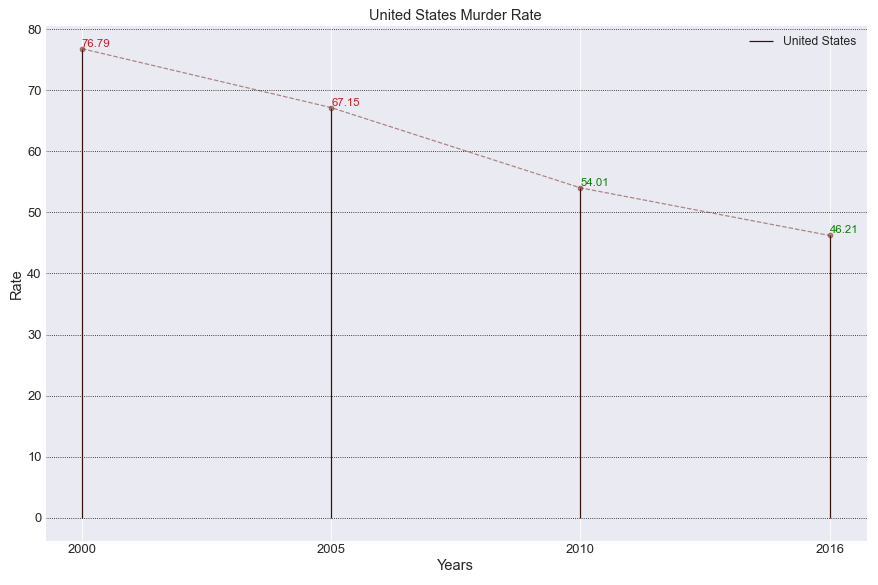

In [510]:
comparing_USA_Murder = Comparing(murder_ratio["United States"])
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_USA_Murder.index, ymin=0, ymax=comparing_USA_Murder.values,label='United States',color="#36110A")
for x, y in zip(comparing_USA_Murder.index, comparing_USA_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#c91a22' if y > 60 else '#098003', 'size':14})
plt.plot(comparing_USA_Murder.index, comparing_USA_Murder.values,'o--', color='#6B1F15', alpha=0.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("United States Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper right",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [511]:
Average_USA_Murder = (76.79 + 67.15 + 54.01 + 46.21)/ 4
Average_USA_Murder

61.04

#### As we can see from the chart that murder rate in USA decreases with an average of 61.04 every 5 Years ....

#### Exploring more details ..

In [512]:
murder_ratio["United States"].describe()

count     27.000000
mean      76.649519
std       25.549383
min       46.212121
25%       55.350122
50%       71.153846
75%       92.327189
max      128.160920
Name: United States, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### China 

<IPython.core.display.Javascript object>


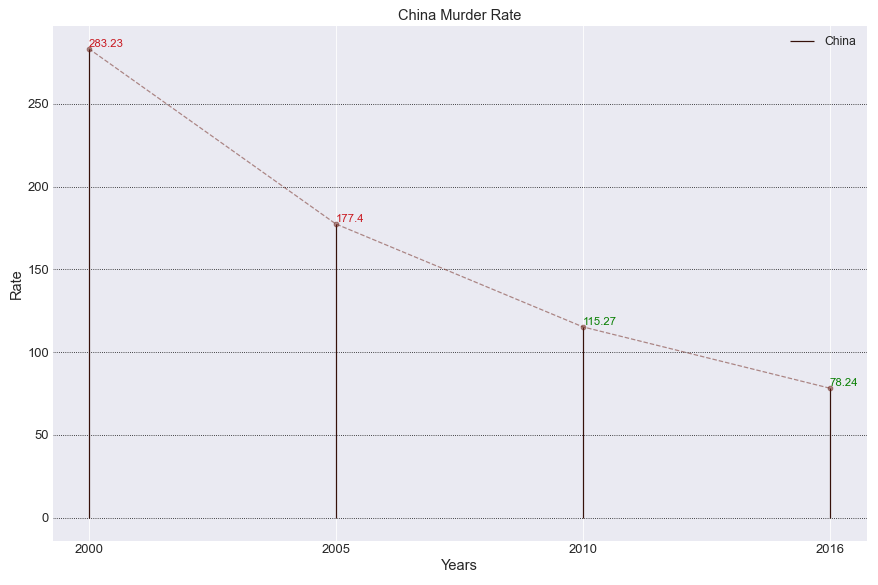

In [513]:
comparing_China_Murder = Comparing(murder_ratio.China)
plt.figure(figsize=(15,10), dpi= 65)
plt.vlines(x=comparing_China_Murder.index, ymin=0, ymax=comparing_China_Murder.values,label='China',color="#36110A")
for x, y in zip(comparing_China_Murder.index, comparing_China_Murder.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#c91a22' if y > 150 else '#098003', 'size':14})
plt.plot(comparing_China_Murder.index, comparing_China_Murder.values,'o--', color='#6B1F15', alpha=0.5)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
title_size = 18
plt.title("China Murder Rate" ,fontsize=title_size)
plt.legend(loc="upper right",fontsize= 15)
plt.ylabel("Rate",fontsize=title_size)
plt.xlabel("Years", fontsize=title_size)
plt.tick_params(labelsize=16,length=0)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

In [514]:
Average_China_Murder = (283.23 + 177.4 + 115.27 + 78.24)/ 4
Average_China_Murder

163.535

#### As we can see from the chart that murder rate in China decreases with an average of 163.535 every 5 Years ....

#### Exploring more details ..

In [515]:
murder_ratio.China.describe()

count     27.000000
mean     229.156154
std      115.507716
min       78.242678
25%      120.514256
50%      213.095238
75%      352.682318
max      392.372881
Name: China, dtype: float64

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

<a id='Question 1'></a>
### Question 1 : Which country has the most and least Murder rate?

### Answer :

#### Calulating the countries that has the most and least Murder rate ... 

In [516]:
df_Murder.set_index("country", inplace = True)

In [517]:
df_Murder = df_Murder.T

In [518]:
df_Murder.columns.rename(name="Years",inplace=True)

In [519]:
murder = {}
for country in df_Murder.columns:
    murder[df_Murder[country].mean()] = country

### Which Country has the most murder Rate?

In [520]:
print("The country with the most Murder Rate is {} with an average of --> {} ....".format(murder[max(murder.keys())],max(murder.keys())))

The country with the most Murder Rate is Brazil with an average of --> 52555.555555555555 ....


### Which Country has the Least murder Rate?

In [521]:
print("The country with the Least Murder Rate is {} with an average of --> {} ....".format(murder[min(murder.keys())],min(murder.keys())))

The country with the Least Murder Rate is Andorra with an average of --> 0.5137037037037038 ....


 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

## Population rate

   ### ----------------------------------------------------------------------------------------------- #
### Egypt 

<IPython.core.display.Javascript object>


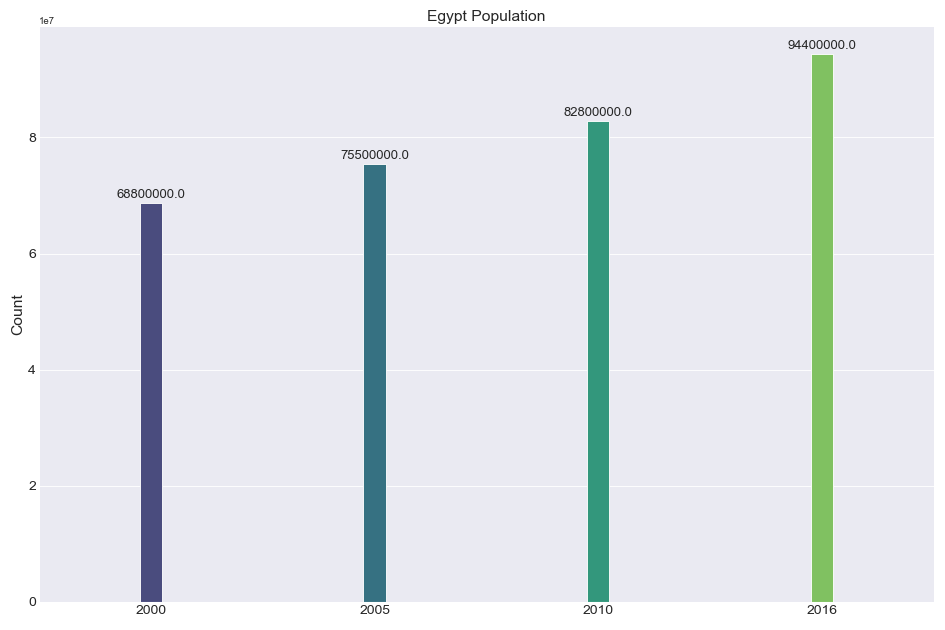

In [522]:
comparing = df_Population[(df_Population.index == "2000") | (df_Population.index == "2005") | (df_Population.index == "2010") | (df_Population.index == "2016")]

fig,ax = plt.subplots(figsize=(15,10),dpi=70)
splot = sns.barplot(x=ye2,y=comparing.Egypt,data=comparing,ci=95,ax=ax,palette = "viridis")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
title_size = 18
ax.set_title("Egypt Population" ,fontsize=title_size)
ax.set_ylabel("Count",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [523]:
Egyption_Population = 94400000 - 68800000
Egyption_Population

25600000

#### As we can see from the chart that Egypt population has increased 25M person in only 16 years...

In [524]:
comparing.Egypt.describe()

count    4.000000e+00
mean     8.037500e+07
std      1.095943e+07
min      6.880000e+07
25%      7.382500e+07
50%      7.915000e+07
75%      8.570000e+07
max      9.440000e+07
Name: Egypt, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Russia 

<IPython.core.display.Javascript object>


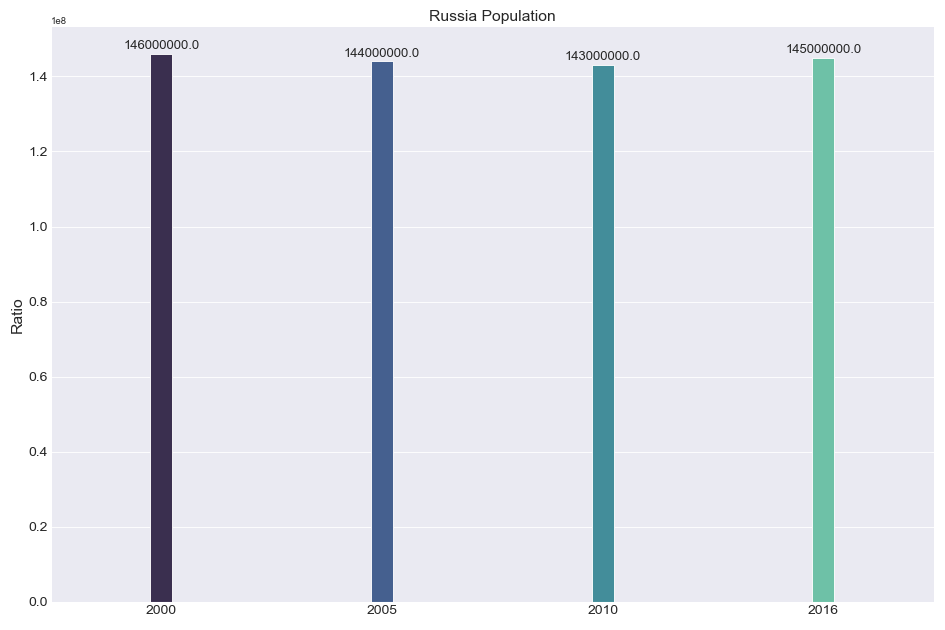

In [525]:
fig,ax = plt.subplots(figsize=(15,10),dpi=70)
splot = sns.barplot(x=ye2,y=comparing.Russia,data=df_Population,ci=95,ax=ax,palette = "mako")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
title_size = 18
ax.set_title("Russia Population" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [526]:
Russia_Population = 14600000 - 14500000
Russia_Population

100000

#### As we can see from the chart that Russia population has decreased 100k person in 16 years...

#### Exploring more details ..

In [527]:
comparing.Russia.describe()

count    4.000000e+00
mean     1.445000e+08
std      1.290994e+06
min      1.430000e+08
25%      1.437500e+08
50%      1.445000e+08
75%      1.452500e+08
max      1.460000e+08
Name: Russia, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### China 

<IPython.core.display.Javascript object>


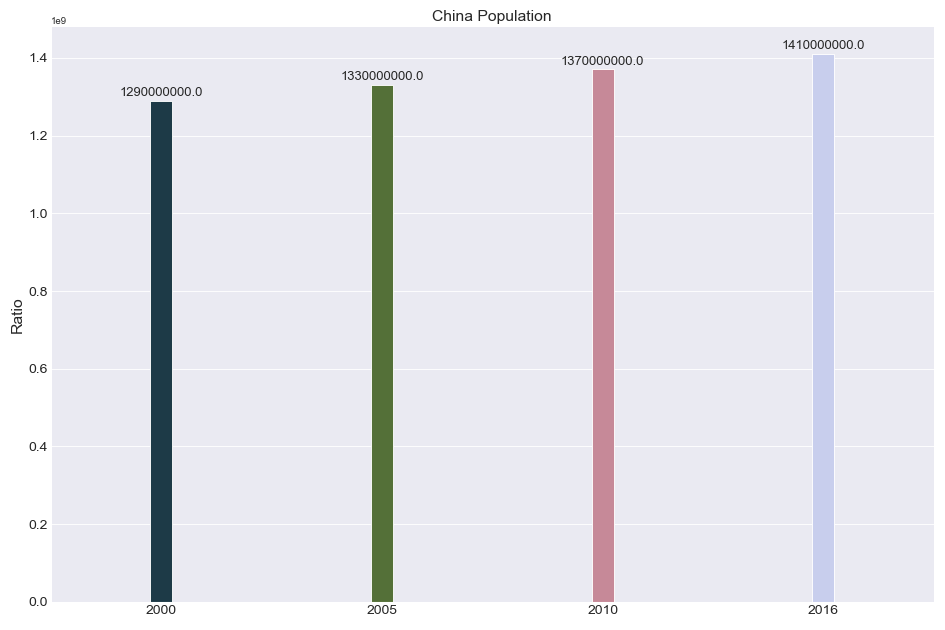

In [528]:
fig,ax = plt.subplots(figsize=(15,10),dpi=70)
splot = sns.barplot(x=ye2,y=comparing.China,data=df_Population,ci=95,ax=ax,palette = "cubehelix")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
title_size = 18
ax.set_title("China Population" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [529]:
China_Population = 1410000000 - 1290000000
China_Population

120000000

#### As we can see from the chart that China population has increased 120M person in only 16 years...

#### Exploring more details ..

In [530]:
comparing.China.describe()

count    4.000000e+00
mean     1.350000e+09
std      5.163978e+07
min      1.290000e+09
25%      1.320000e+09
50%      1.350000e+09
75%      1.380000e+09
max      1.410000e+09
Name: China, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Japan 

<IPython.core.display.Javascript object>


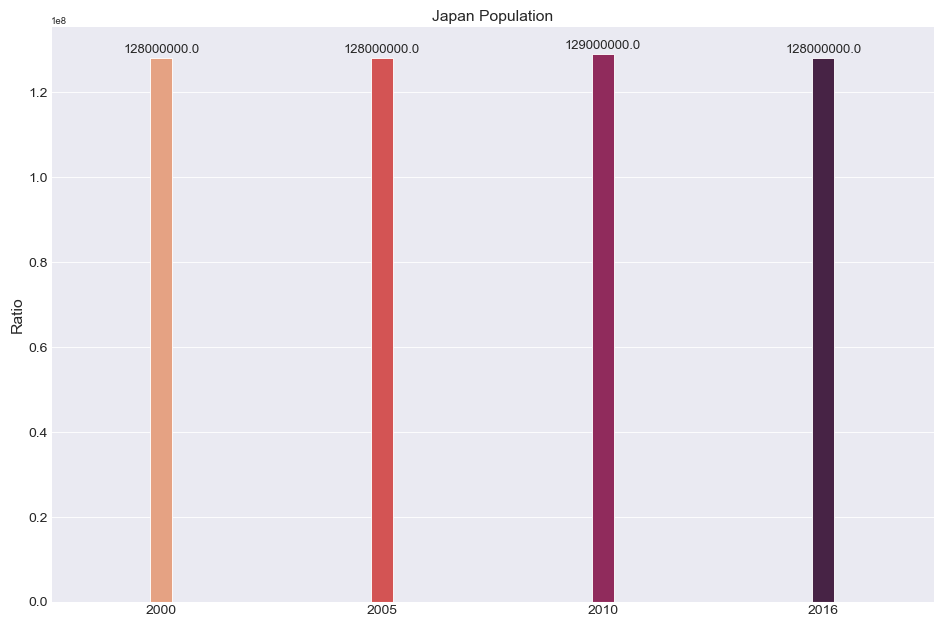

In [531]:
fig,ax = plt.subplots(figsize=(15,10),dpi=70)
splot = sns.barplot(x=ye2,y=comparing.Japan,data=df_Population,ci=95,ax=ax,palette = "rocket_r")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
title_size = 18
ax.set_title("Japan Population" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [532]:
Japan_Population = 129000000 - 128000000
Japan_Population

1000000

#### As we can see from the chart that Japan population has increased in 2010 with 1M person but decreased in 2016 to be same as 2000 population which is 128M person...

#### Exploring more details ..

In [533]:
comparing.Japan.describe()

count            4.0
mean     128250000.0
std         500000.0
min      128000000.0
25%      128000000.0
50%      128000000.0
75%      128250000.0
max      129000000.0
Name: Japan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### United States 

<IPython.core.display.Javascript object>


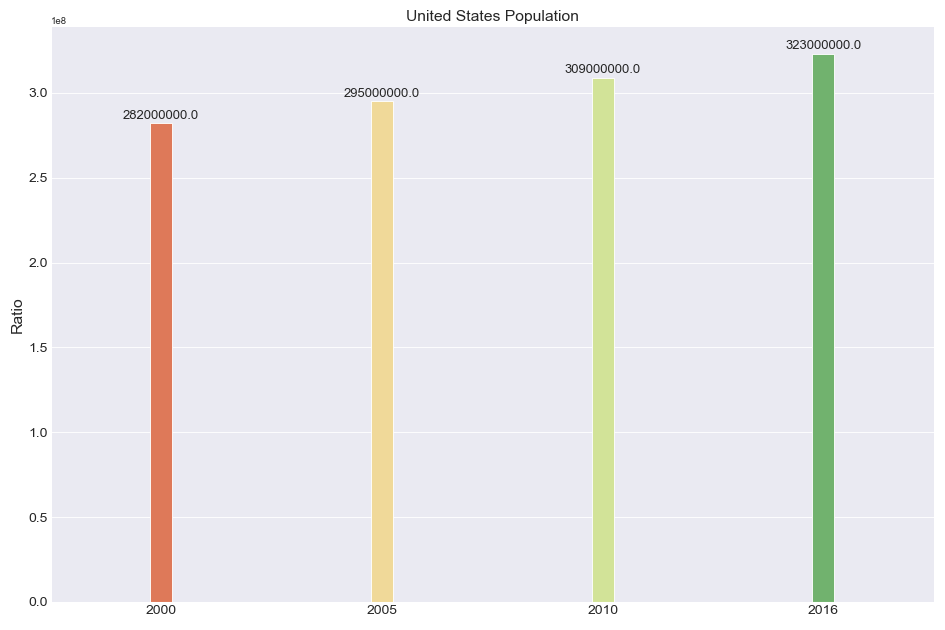

In [534]:
fig,ax = plt.subplots(figsize=(15,10),dpi=70)
splot = sns.barplot(x=ye2,y=comparing["United States"],data=df_Population,ci=95,ax=ax,palette = "RdYlGn")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
title_size = 18
ax.set_title("United States Population" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [535]:
USA_Population = 323000000 - 282000000
USA_Population

41000000

#### As we can see from the chart that USA population has increased 41M person in only 16 years...

#### Exploring more details ..

In [536]:
comparing["United States"].describe()

count    4.000000e+00
mean     3.022500e+08
std      1.768945e+07
min      2.820000e+08
25%      2.917500e+08
50%      3.020000e+08
75%      3.125000e+08
max      3.230000e+08
Name: United States, dtype: float64

In [537]:
comparing_Afghanistan_Population.values

array([20800000., 25700000., 29200000., 35400000.])

   ### ----------------------------------------------------------------------------------------------- #
### Afghanistan 

<IPython.core.display.Javascript object>


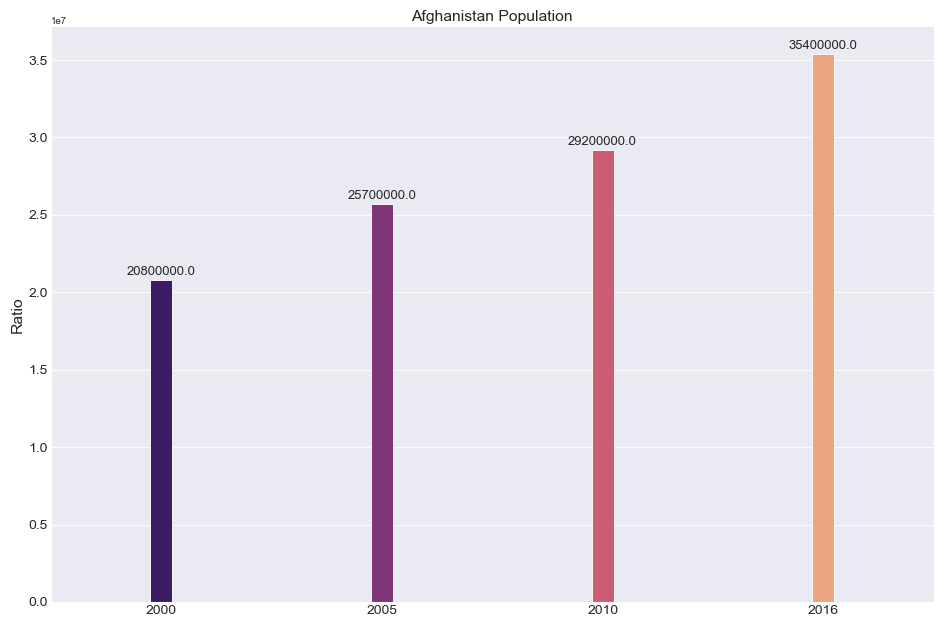

In [538]:
fig,ax = plt.subplots(figsize=(15,10),dpi=70)
comparing_Afghanistan_Population = Comparing(df_Population.Afghanistan)
splot = sns.barplot(x=ye2,y=comparing_Afghanistan_Population,data=df_Population,ci=95,ax=ax,palette = "magma")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), ".1f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')

for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - 0.1

        # we change the bar width
        patch.set_width(.1)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
title_size = 18
ax.set_title("Afghanistan Population" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

In [539]:
Afghanistan_Population = 354000000 - 208000000
Afghanistan_Population

146000000

#### As we can see from the chart that Egypt population has increased 146M person in only 16 years...

#### Exploring more details ..

In [540]:
comparing.Afghanistan.describe()

count    4.000000e+00
mean     2.777500e+07
std      6.140779e+06
min      2.080000e+07
25%      2.447500e+07
50%      2.745000e+07
75%      3.075000e+07
max      3.540000e+07
Name: Afghanistan, dtype: float64

 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

<a id='Question 2'></a>
### Question 2 : Which is the most and least country in Population?

## Answer:

#### Calulating the countries that has the most and least population rate 

In [541]:
population = {}
for country in df_Population.columns:
    population[df_Population[country].mean()] = country

### Which country has the most population  ?

In [542]:
print("The country with the most Population Rate is {} with an average of --> {} ....".format(population[max(population.keys())],max(population.keys())))

The country with the most Population Rate is China with an average of --> 1308888888.8888888 ....


### Which country has the least population ?

In [543]:
print("The country with the most Population Rate is {} with an average of --> {} ....".format(population[min(population.keys())],min(population.keys())))

The country with the most Population Rate is Holy See with an average of --> 785.5925925925926 ....


 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

## GDP Data

<IPython.core.display.Javascript object>


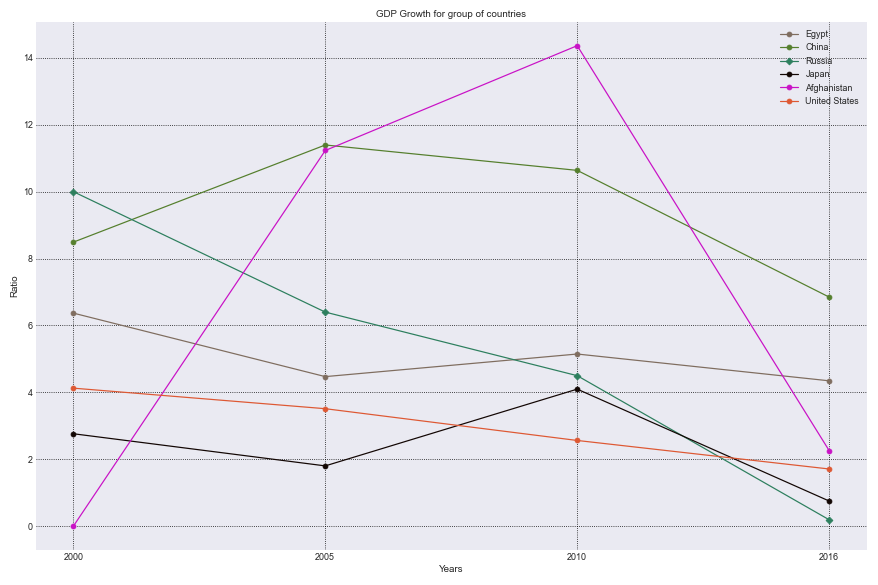

In [544]:
plt.style.use('seaborn-dark')
comparing_Egypt_GDP = Comparing(df_GDP.Egypt)
comparing_Russia_GDP = Comparing(df_GDP.Russia)
comparing_China_GDP = Comparing(df_GDP.China)
comparing_Afghanistan_GDP = Comparing(df_GDP.Afghanistan)
comparing_Japan_GDP = Comparing(df_GDP.Japan)
comparing_USA_GDP = Comparing(df_GDP["United States"])

fig, ax = plt.subplots(figsize = (15,10),dpi=65)

a = ax.plot(comparing_Egypt_GDP.index, comparing_Egypt_GDP.values, 'o-',color='#7f6d5f', label='Egypt')
ax.plot(comparing_China_GDP.index, comparing_China_GDP.values, 'o-', color='#557f2d', label='China')
ax.plot(comparing_Russia_GDP.index, comparing_Russia_GDP.values,'D-',color='#2d7f5e',label='Russia')
ax.plot(comparing_Japan_GDP.index, comparing_Japan_GDP.values, 'o-',color='#120603',label='Japan')
ax.plot(comparing_Afghanistan_GDP.index, comparing_Afghanistan_GDP.values, 'o-',color='#c912c6',label='Afghanistan')
ax.plot(comparing_USA_GDP.index, comparing_USA_GDP.values, 'o-',color='#DE5833',label='United States')
ax.set_title('GDP Growth for group of countries')
ax.set_xlabel('Years')
ax.set_ylabel('Ratio')
plt.legend()
plt.grid(axis = 'x', linestyle=':', alpha=1,color = 'black')
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that Afghanistan GDP Increased from 0% in 2000 to 14.8% in 2010 then decreased to 2.4% in 2016 .. 
#### While Russia and Japan had a 10% and 2.9% in their GDP in 2000 but decreased alot in 2016 with a 0.1 % for Russia and 0.4 for Japan. ...
#### Egypt had more increase in GDP than USA by 6.2% to 4.1% in 2000 and same for 2016 Egypt Had 4.3% Increase while USA had 1.8% increase .
#### But for China it started with 8.8% increase in 2000 but decreased to 7% in 2016 ...

   ### ----------------------------------------------------------------------------------------------- #


### Egypt 

<IPython.core.display.Javascript object>


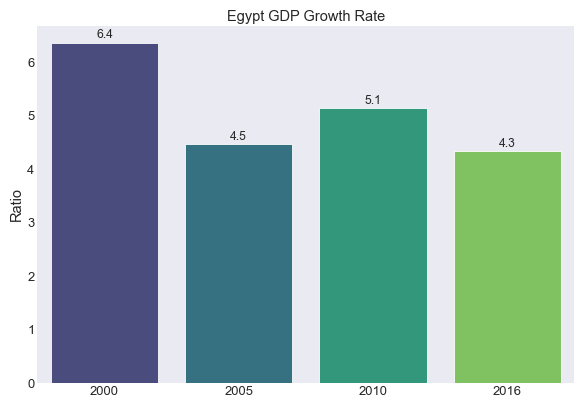

In [545]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_Egypt_GDP.index,y=comparing_Egypt_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "viridis")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')
title_size = 18
ax.set_title("Egypt GDP Growth Rate" ,fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is a decrease in Egypt GDP since 2000 till 2016 by 2.1% ..

#### Exploring more details ..

In [548]:
df_GDP.Egypt.describe()

count    27.000000
mean      4.357928
std       1.650896
min       1.125405
25%       3.054683
50%       4.471744
75%       5.533926
max       7.156284
Name: Egypt, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Russia 

<IPython.core.display.Javascript object>


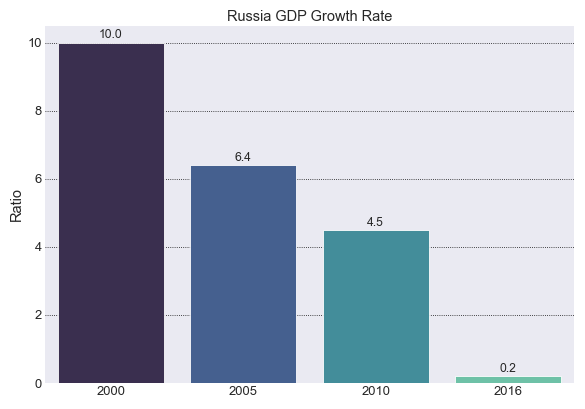

In [623]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_Russia_GDP.index,y=comparing_Russia_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "mako")
for p in splot.patches:
    if p.get_height() > 0: # -- > i used if statments bcz when i try to use annotators , there is some countries that have negative values , so the position of the value gets in the bar.. 
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 : # --> i had to seperate the positive values from the negative values and give each ot them a different axis...
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), # ---> Negative y axis since its a negative value ...
                       textcoords = 'offset points')
    
ax.set_title("Russia GDP Growth Rate",fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is a decrease in Russia GDP since 2000 till 2016 by 9.8% ..

#### Exploring more details ..

In [549]:
df_GDP.Russia.describe()

count    27.000000
mean      0.708213
std       6.655096
min     -14.531074
25%      -3.949299
50%       1.755422
75%       5.799942
max      10.000067
Name: Russia, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### United States 

<IPython.core.display.Javascript object>


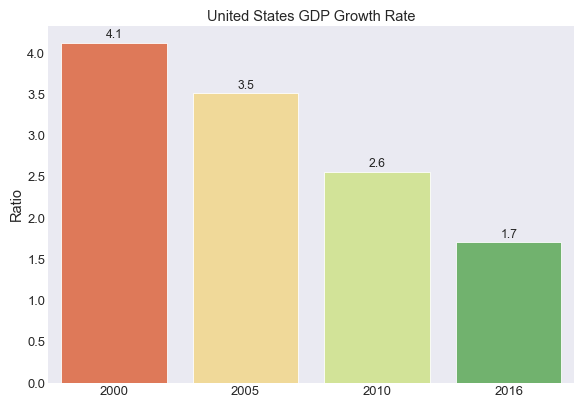

In [624]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_USA_GDP.index,y=comparing_USA_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "RdYlGn")
for p in splot.patches:
    if p.get_height() > 0:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 :
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), 
                       textcoords = 'offset points')
    
ax.set_title("United States GDP Growth Rate",fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is a decrease in USA GDP since 2000 till 2016 by 3.6% ..

#### Exploring more details ..

In [550]:
df_GDP["United States"].describe()

count    27.000000
mean      2.473026
std       1.620977
min      -2.536757
25%       1.791888
50%       2.684217
75%       3.647503
max       4.753236
Name: United States, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Afghanistan 

<IPython.core.display.Javascript object>


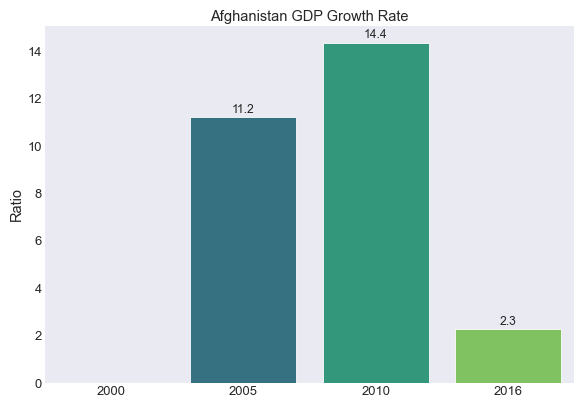

In [625]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_Afghanistan_GDP.index,y=comparing_Afghanistan_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "viridis")
for p in splot.patches:
    if p.get_height() > 0:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 :
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), 
                       textcoords = 'offset points')
    
ax.set_title("Afghanistan GDP Growth Rate",fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is an increase in Afghanistan GDP since 2000 till 2016 by 2.3% ..

#### Exploring more details ..

In [551]:
df_GDP.Afghanistan.describe()

count    27.000000
mean      3.909383
std       5.888010
min       0.000000
25%       0.000000
50%       0.426355
75%       5.479074
max      21.390528
Name: Afghanistan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### China 

<IPython.core.display.Javascript object>


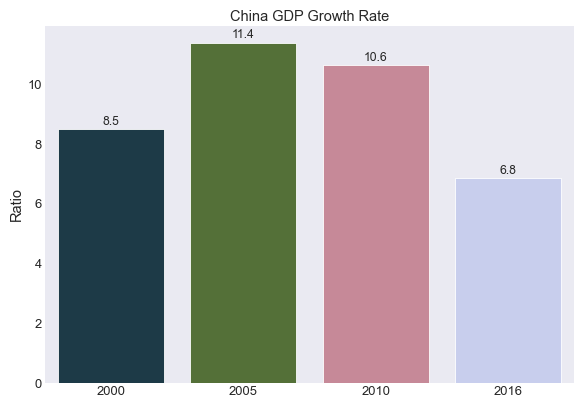

In [626]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_China_GDP.index,y=comparing_China_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "cubehelix")
for p in splot.patches:
    if p.get_height() > 0:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 :
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), 
                       textcoords = 'offset points')
    
ax.set_title("China GDP Growth Rate",fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is a decrease in China GDP since 2000 till 2016 by 2.3% ..

#### Exploring more details ..

In [552]:
df_GDP.China.describe()

count    27.000000
mean      9.651421
std       2.457343
min       3.920251
25%       7.854844
50%       9.398726
75%      10.794913
max      14.230861
Name: China, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Japan 

<IPython.core.display.Javascript object>


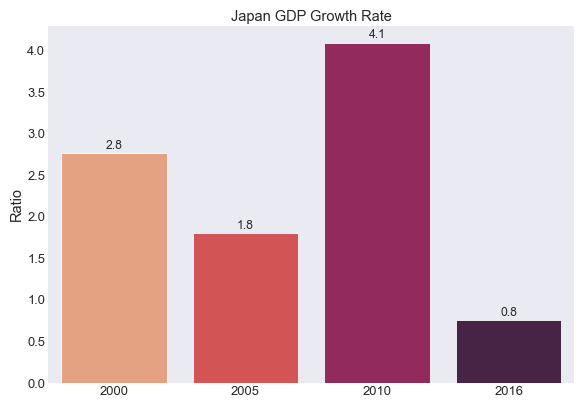

In [627]:
fig,ax = plt.subplots(figsize=(10,7),dpi=65)
splot = sns.barplot(x=comparing_Japan_GDP.index,y=comparing_Japan_GDP.values,data=df_GDP,ci=95,ax=ax,palette = "rocket_r")
for p in splot.patches:
    if p.get_height() > 0:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    if p.get_height() < 0 :
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -11), 
                       textcoords = 'offset points')
ax.set_title("Japan GDP Growth Rate",fontsize=title_size)
ax.set_ylabel("Ratio",fontsize=title_size)
ax.tick_params(labelsize=16,length=0)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from the chart that there is a decrease in Japan GDP since 2000 till 2016 by 2% ..

#### Exploring more details ..

In [553]:
df_GDP.Japan.describe()

count    27.000000
mean      1.094228
std       2.025525
min      -5.693236
25%       0.169084
50%       1.372350
75%       2.095608
max       4.892713
Name: Japan, dtype: float64

 ### ------------------------------------------------------------------------ ###

<a id='Question 3'></a>
### Question 3 : Which country has the most and least GDP Rate?

## Answer:

In [559]:
economy = {}
for country in df_GDP.columns[1:]:
    economy[df_GDP[country].mean()] = country

### Which country has the most GDP growth?

In [560]:
print("The country with the most economy Growth is {} with an average of --> {} ....".format(economy[max(economy.keys())],max(economy.keys())))

The country with the most economy Growth is Equatorial Guinea with an average of --> 19.974110408814813 ....


### Which country has the least GDP growth ?

In [561]:
print("The country with the least Growth is {} with an average of --> {} ....".format(economy[min(economy.keys())],min(economy.keys())))

The country with the least Growth is Ukraine with an average of --> -1.8408876753703698 ....


 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###

## Income Data 

<IPython.core.display.Javascript object>


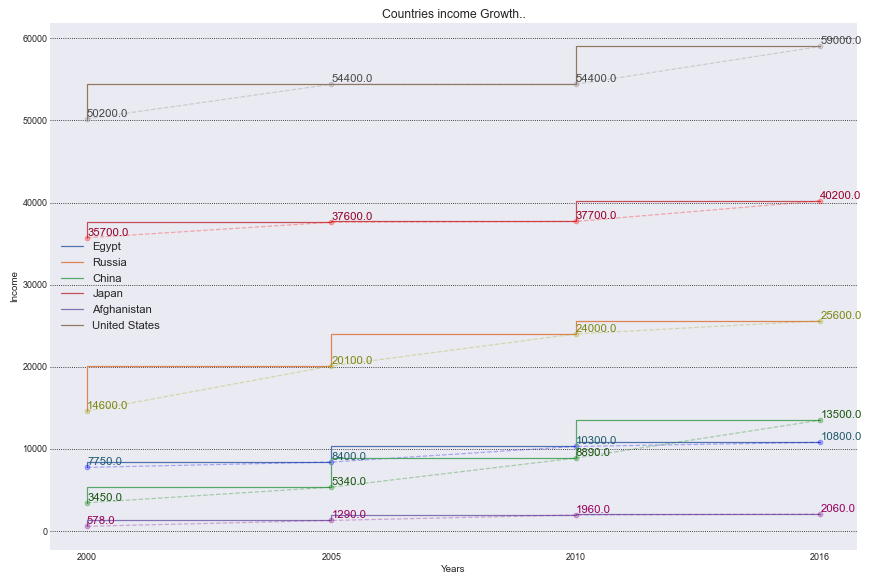

In [577]:
plt.figure(figsize=(15,10),dpi= 65)
comparing_Egypt_Income = Comparing(df_Income.Egypt)
comparing_Russia_Income = Comparing(df_Income.Russia)
comparing_China_Income = Comparing(df_Income.China)
comparing_Afghanistan_Income = Comparing(df_Income.Afghanistan)
comparing_Japan_Income = Comparing(df_Income.Japan)
comparing_USA_Income = Comparing(df_Income["United States"])

plt.step(comparing_Egypt_Income.index, comparing_Egypt_Income.values, label='Egypt')
plt.plot(comparing_Egypt_Income.index, comparing_Egypt_Income.values, 'o--', color='blue', alpha=0.3)
for x, y in zip(comparing_Egypt_Income.index, comparing_Egypt_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#1E5A6A', 'size':14})

plt.step(comparing_Russia_Income.index, comparing_Russia_Income.values, label='Russia')
plt.plot(comparing_Russia_Income.index, comparing_Russia_Income.values, 'o--', color='#a1a30b', alpha=0.3)
for x, y in zip(comparing_Russia_Income.index, comparing_Russia_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#7d870e', 'size':14})
    
plt.step(comparing_China_Income.index, comparing_China_Income.values, label='China')
plt.plot(comparing_China_Income.index, comparing_China_Income.values, 'o--', color='green', alpha=0.3)
for x, y in zip(comparing_China_Income.index, comparing_China_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#18540C', 'size':14})
    
plt.step(comparing_Japan_Income.index, comparing_Japan_Income.values, label='Japan')
plt.plot(comparing_Japan_Income.index, comparing_Japan_Income.values, 'o--', color='red', alpha=0.3)
for x, y in zip(comparing_Japan_Income.index, comparing_Japan_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#940025', 'size':14})
    
plt.step(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values, label='Afghanistan')
plt.plot(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values, 'o--', color='purple', alpha=0.3)
for x, y in zip(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#96005d', 'size':14})
    
plt.step(comparing_USA_Income.index, comparing_USA_Income.values, label='United States')
plt.plot(comparing_USA_Income.index, comparing_USA_Income.values, 'o--', color='grey', alpha=0.3)
for x, y in zip(comparing_USA_Income.index, comparing_USA_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#474747', 'size':14})
    
plt.title('Countries income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'y', linestyle=':', alpha=1,color = 'black')
plt.legend(fontsize = 14 , loc = "center left")
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : 
   ####    Afghanistan income per person Increased from \\$578 in 2000 to \\$2060 in 2016.
   ####    Russia income per person Increased from \\$14600 in 2000 to \\$25600 in 2016.
   ####    Japan  income per person Increased from \\$35700 in 2000 to \\$40200 in 2016.
   ####    Egypt income per person Increased from \\$7750 in 2000 to \\$10800 in 2016.
   ####    USA income per person Increased from \\$50200 in 2000 to \\$59000 in 2016.
   ####    China income per person Increased from \\$3450 in 2000 to \\$13500 in 2016.

   ### ----------------------------------------------------------------------------------------------- #
### Egypt

<IPython.core.display.Javascript object>


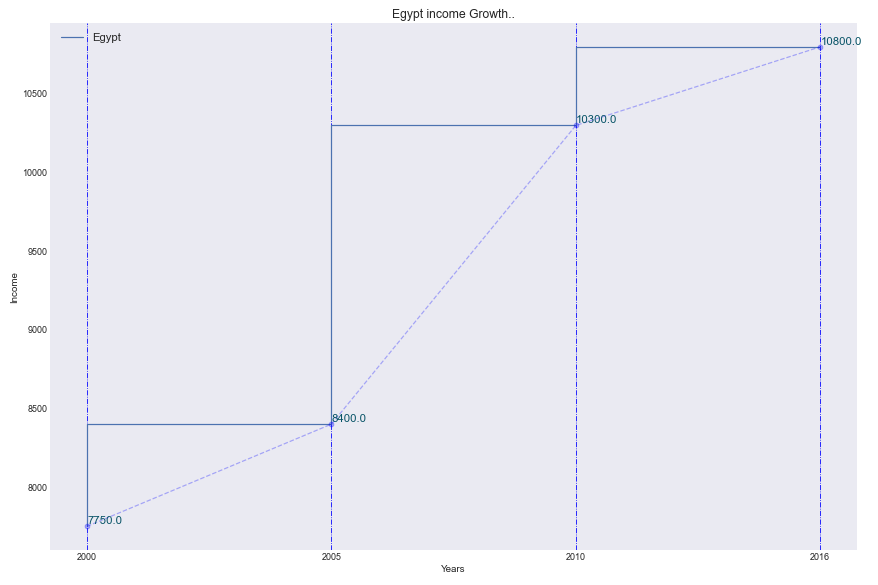

In [588]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_Egypt_Income.index, comparing_Egypt_Income.values, label='Egypt')
plt.plot(comparing_Egypt_Income.index, comparing_Egypt_Income.values, 'o--', color='blue', alpha=0.3)
for x, y in zip(comparing_Egypt_Income.index, comparing_Egypt_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#065266', 'size':14})
plt.title('Egypt income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'blue')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Egypt income per person Increased by \\$3050 in 16 years.


#### Exploring more details ..

In [610]:
df_Income.Egypt.describe()

count       27.00000
mean      8309.62963
std       1664.35823
min       6020.00000
25%       6785.00000
50%       8010.00000
75%      10150.00000
max      10800.00000
Name: Egypt, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Russia

<IPython.core.display.Javascript object>


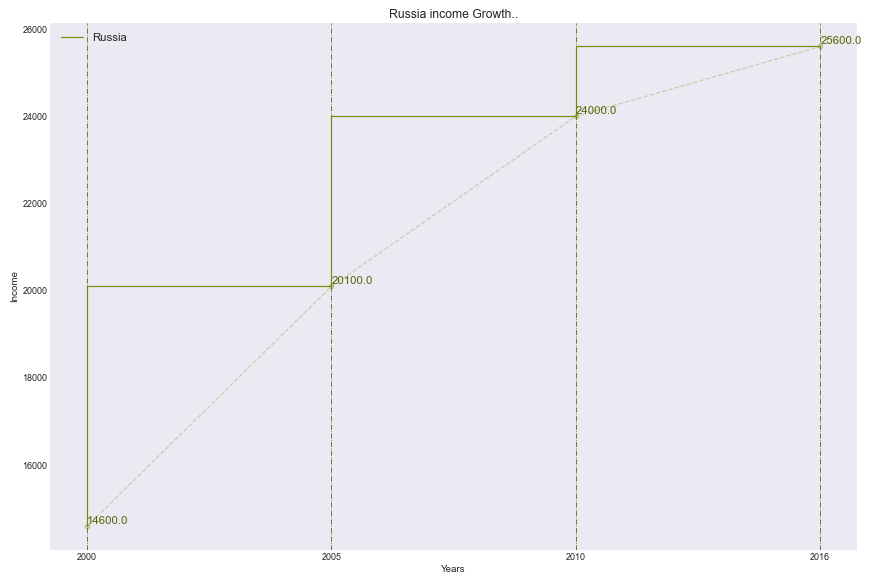

In [596]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_Russia_Income.index, comparing_Russia_Income.values, label='Russia', color = "#7d870e")
plt.plot(comparing_Russia_Income.index, comparing_Russia_Income.values, 'o--', color='#7d870e', alpha=0.3)
for x, y in zip(comparing_Russia_Income.index, comparing_Russia_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#596100', 'size':14})
plt.title('Russia income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#596100')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Russia income per person Increased by \\$11000 in 16 years.

#### Exploring more details ..

In [609]:
df_Income.Russia.describe()

count       27.000000
mean     19585.185185
std       4987.422928
min      12400.000000
25%      15000.000000
50%      20100.000000
75%      24500.000000
max      26400.000000
Name: Russia, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### China 

<IPython.core.display.Javascript object>


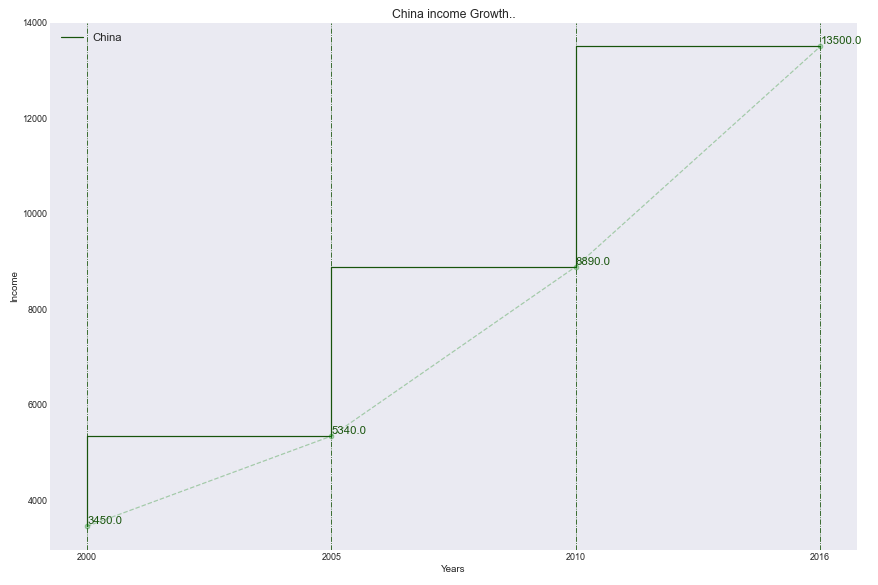

In [598]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_China_Income.index, comparing_China_Income.values, label='China', color = "#18540C")
plt.plot(comparing_China_Income.index, comparing_China_Income.values, 'o--', color='green', alpha=0.3)
for x, y in zip(comparing_China_Income.index, comparing_China_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#18540C', 'size':14})
plt.title('China income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#18540C')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : China income per person Increased by \\$10050 in 16 years.

#### Exploring more details ..

In [608]:
df_Income.China.describe()

count       27.000000
mean      5744.814815
std       3778.361845
min       1420.000000
25%       2705.000000
50%       4400.000000
75%       8480.000000
max      13500.000000
Name: China, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Japan 

<IPython.core.display.Javascript object>


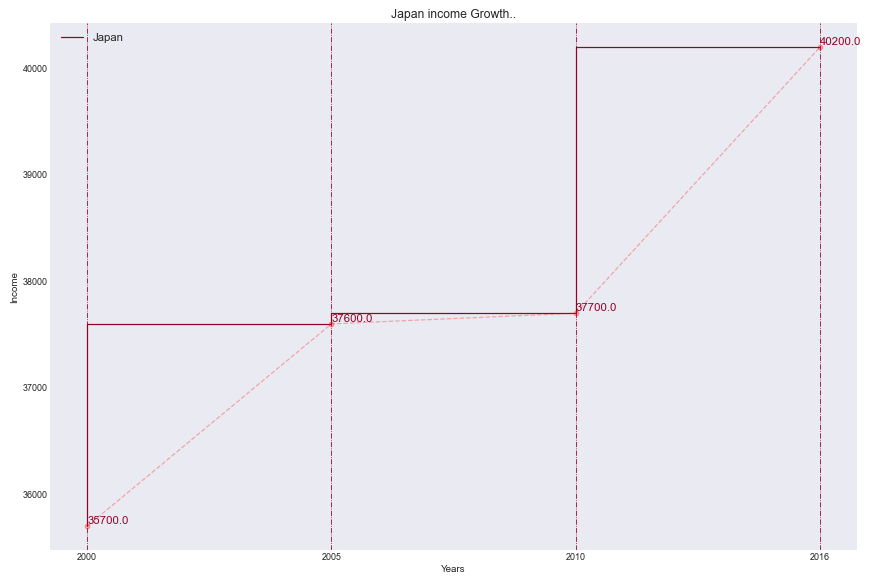

In [601]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_Japan_Income.index, comparing_Japan_Income.values, label='Japan',color="#940025")
plt.plot(comparing_Japan_Income.index, comparing_Japan_Income.values, 'o--', color='red', alpha=0.3)
for x, y in zip(comparing_Japan_Income.index, comparing_Japan_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#940025', 'size':14})
plt.title('Japan income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#940025')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that :   Japan  income per person Increased by \\$4500 in 16 years.

#### Exploring more details ..

In [607]:
df_Income.Japan.describe()

count       27.000000
mean     36377.777778
std       2249.672341
min      32300.000000
25%      34900.000000
50%      36200.000000
75%      38200.000000
max      40200.000000
Name: Japan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### United States 

<IPython.core.display.Javascript object>


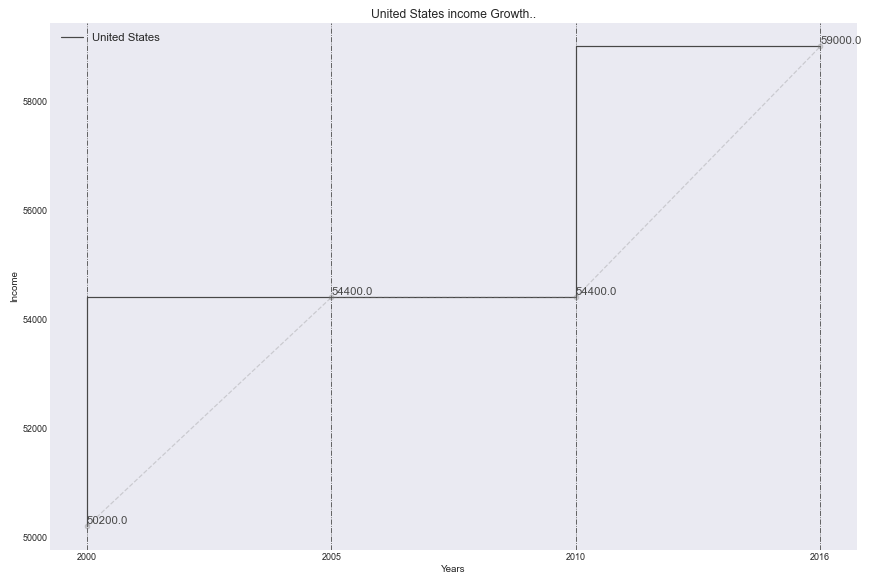

In [599]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_USA_Income.index, comparing_USA_Income.values, label='United States',color="#474747")
plt.plot(comparing_USA_Income.index, comparing_USA_Income.values, 'o--', color='grey', alpha=0.3)
for x, y in zip(comparing_USA_Income.index, comparing_USA_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#474747', 'size':14})
plt.title('United States income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#474747')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : USA income per person Increased by \\$8800 in 16 years.

#### Exploring more details ..

In [605]:
df_Income["United States"].describe()

count       27.000000
mean     50333.333333
std       6139.218191
min      39900.000000
25%      44850.000000
50%      51600.000000
75%      55350.000000
max      59000.000000
Name: United States, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Afghanistan

<IPython.core.display.Javascript object>


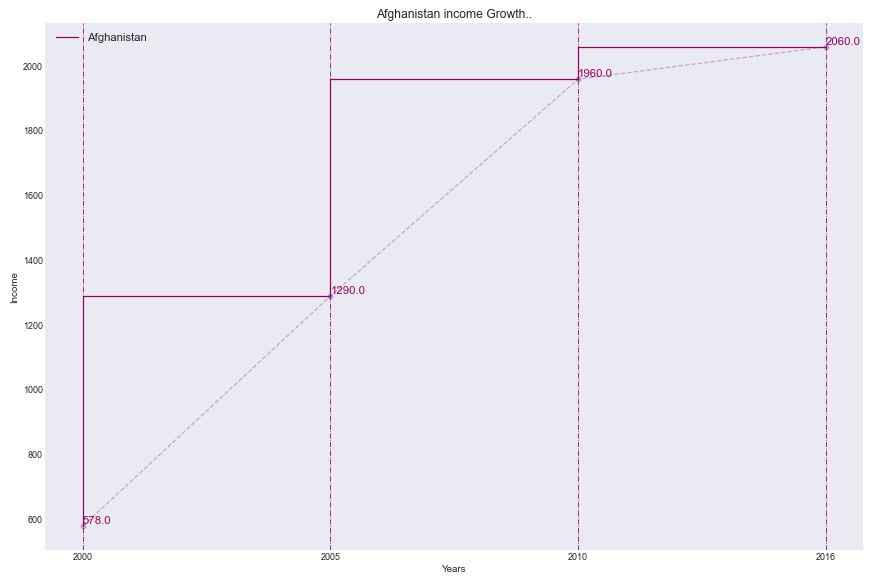

In [603]:
plt.figure(figsize=(15,10),dpi= 65)
plt.step(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values, label='Afghanistan',color = '#96005d')
plt.plot(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values, 'o--', color='purple', alpha=0.3)
for x, y in zip(comparing_Afghanistan_Income.index, comparing_Afghanistan_Income.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#96005d', 'size':14})
plt.title('Afghanistan income Growth..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Income")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#96005d')
plt.legend(loc = "upper left", fontsize = 14)
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that :  Afghanistan income per person Increased by \\$1482 in 16 years.


#### Exploring more details ..

In [606]:
df_Income.Afghanistan.describe()

count      27.000000
mean     1256.592593
std       573.533331
min       493.000000
25%       677.500000
50%      1200.000000
75%      1835.000000
max      2120.000000
Name: Afghanistan, dtype: float64

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='Question 4'></a>
### Question 4 : Which country has the most and least Income Rate?

## Answer

#### Calulating the countries that has the most and least income rate ... 

In [611]:
Income = {}
for country in df_Income.columns[1:]:
    Income[df_Income[country].mean()] = country

### Which country has the most income per person?

In [614]:
print("The country with the most Income Rate is {} with an average of --> ${}  ....".format(Income[max(Income.keys())],max(Income.keys())))

The country with the most Income Rate is Luxembourg with an average of --> $95451.85185185185  ....


### Which country has the least income per person?

In [620]:
print("The country with the least Income Rate is {} with an average of --> ${} ....".format(Income[min(Income.keys())],min(Income.keys())))

The country with the least Income Rate is Somalia with an average of --> $732.1481481481482 ....


## -------------------------------------------------------------------------------------------------------------------------- ###

## UnEmployment Ratio Data

<IPython.core.display.Javascript object>


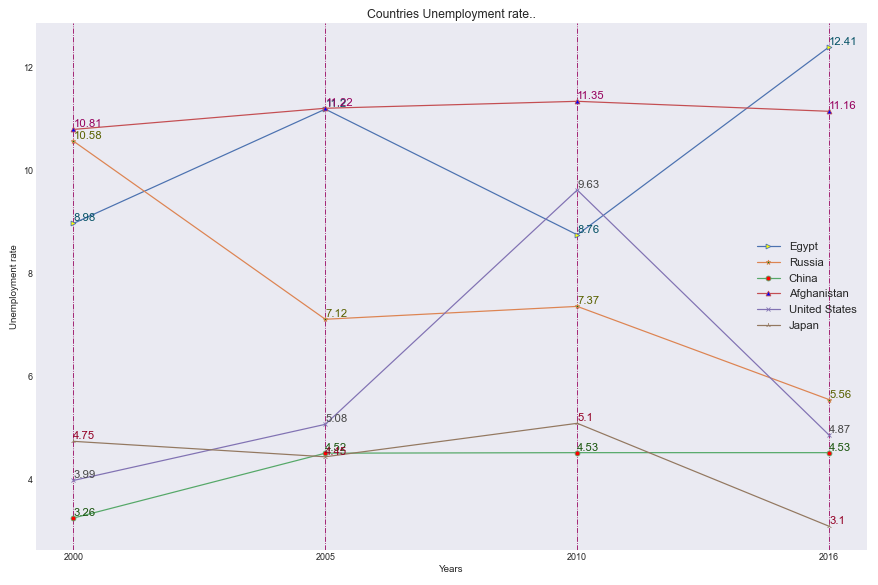

In [632]:
plt.figure(figsize=(15,10),dpi= 65)
comparing_Egypt_Unemployment = Comparing(df_Unemployment.Egypt)
comparing_Russia_Unemployment = Comparing(df_Unemployment.Russia)
comparing_China_Unemployment = Comparing(df_Unemployment.China)
comparing_Afghanistan_Unemployment = Comparing(df_Unemployment.Afghanistan)
comparing_Japan_Unemployment = Comparing(df_Unemployment.Japan)
comparing_USA_Unemployment = Comparing(df_Unemployment["United States"])
plt.plot(comparing_Egypt_Unemployment.index,comparing_Egypt_Unemployment.values,'->',markerfacecolor = "yellow", label='Egypt')
for x, y in zip(comparing_Egypt_Unemployment.index, comparing_Egypt_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#065266', 'size':14})

plt.plot(comparing_Russia_Unemployment.index,comparing_Russia_Unemployment.values,'-*',markerfacecolor = "green" ,label='Russia')
for x, y in zip(comparing_Russia_Unemployment.index, comparing_Russia_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#596100', 'size':14})

plt.plot(comparing_China_Unemployment.index,comparing_China_Unemployment.values,'-o',markerfacecolor = "red",  label='China')
for x, y in zip(comparing_China_Unemployment.index, comparing_China_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#18540C', 'size':14})

plt.plot(comparing_Afghanistan_Unemployment.index,comparing_Afghanistan_Unemployment.values,'-^',markerfacecolor = "blue" , label='Afghanistan')
for x, y in zip(comparing_Afghanistan_Unemployment.index, comparing_Afghanistan_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#96005d', 'size':14})

plt.plot(comparing_USA_Unemployment.index,comparing_USA_Unemployment.values,'-x',markerfacecolor = "purple" , label='United States')
for x, y in zip(comparing_USA_Unemployment.index, comparing_USA_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#474747', 'size':14})

plt.plot(comparing_Japan_Unemployment.index,comparing_Japan_Unemployment.values,'-2',markerfacecolor = "gray",  label='Japan')
for x, y in zip(comparing_Japan_Unemployment.index, comparing_Japan_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#940025', 'size':14})

plt.title('Countries Unemployment rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#96005d')
plt.legend(fontsize=14)
plt.tight_layout()

#### Understanding the Chart ..

#### As we can see from chart that : 
   ####    Afghanistan Unemployment rate Increased from 10.81 in 2000 to 11.16 in 2016.
   ####    Russia Unemployment rate decreased from 10.58 in 2000 to 5.56 in 2016.
   ####    Japan  Unemployment rate decreased from 4.75 in 2000 to 3.1 in 2016.
   ####    Egypt Unemployment rate Increased from 8.95 in 2000 to 12.41 in 2016.
   ####    USA Unemployment rate Increased from 3.99 in 2000 to 9.63 in 2010 surpassing Egypt by 0.68, and then decreased to  4.87 in 2016.
   ####    China Unemployment rate Increased from 3.26 in 2000 to 4.53 in 2016.

   ### ----------------------------------------------------------------------------------------------- #
### Egypt

<IPython.core.display.Javascript object>


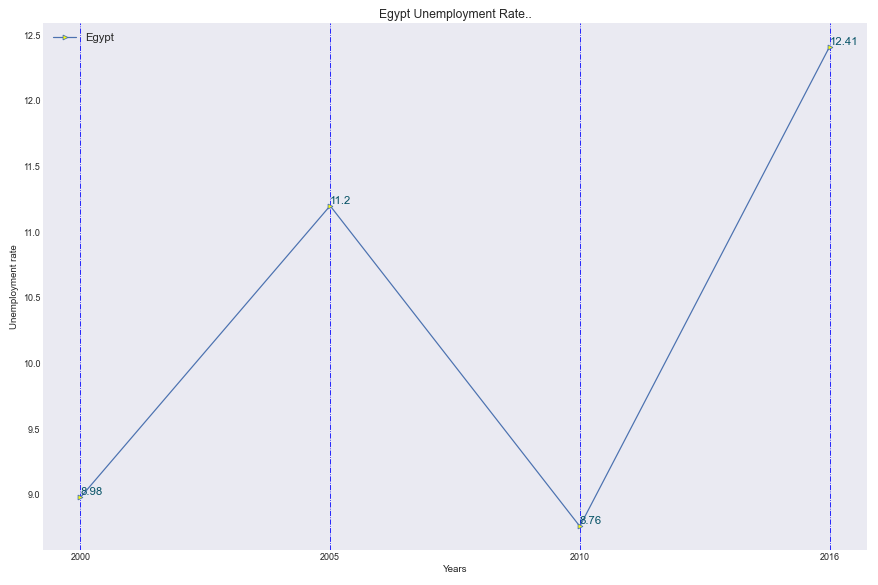

In [637]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_Egypt_Unemployment.index, comparing_Egypt_Unemployment.values,'->',markerfacecolor = "yellow", label='Egypt')
for x, y in zip(comparing_Egypt_Unemployment.index, comparing_Egypt_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#065266', 'size':14})

plt.title('Egypt Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper left")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'blue')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Egypt Unemployment rate Increased 3.46 in only 16 years ..

#### Exploring more details ..

In [649]:
df_Unemployment.Egypt.describe()

count    27.000000
mean      9.894074
std       2.564502
min       0.000000
25%       8.860000
50%      10.010000
75%      11.120000
max      13.150000
Name: Egypt, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Russia

<IPython.core.display.Javascript object>


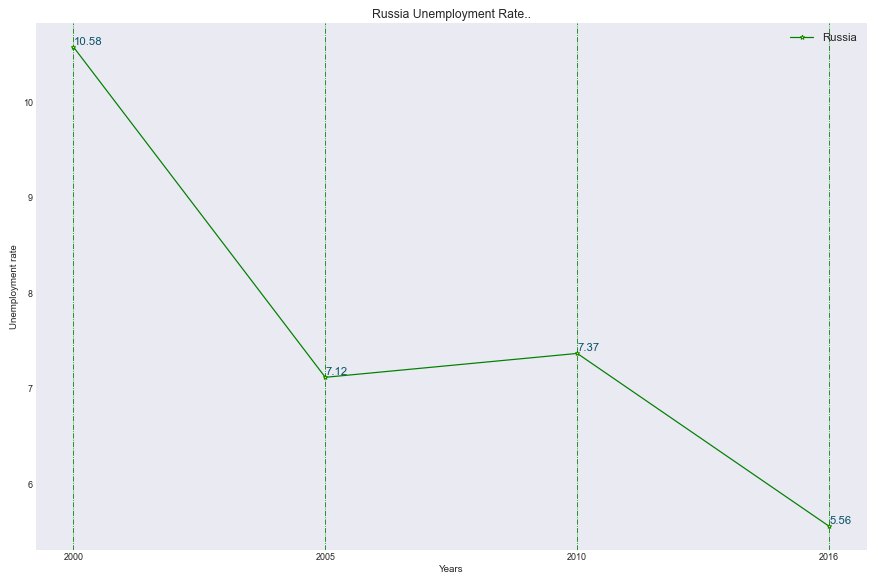

In [639]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_Russia_Unemployment.index, comparing_Russia_Unemployment.values,'-*',color = "green",markerfacecolor = "yellow" ,label='Russia')
for x, y in zip(comparing_Russia_Unemployment.index, comparing_Russia_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#065266', 'size':14})

plt.title('Russia Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper right")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'green')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Russia Unemployment rate decreased 5.02 in only 16 years ..

#### Exploring more details ..

In [648]:
df_Unemployment["Russia"].describe()

count    27.000000
mean      7.445370
std       2.770113
min       0.000000
25%       5.565000
50%       7.120000
75%       8.640000
max      13.260000
Name: Russia, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### China

<IPython.core.display.Javascript object>


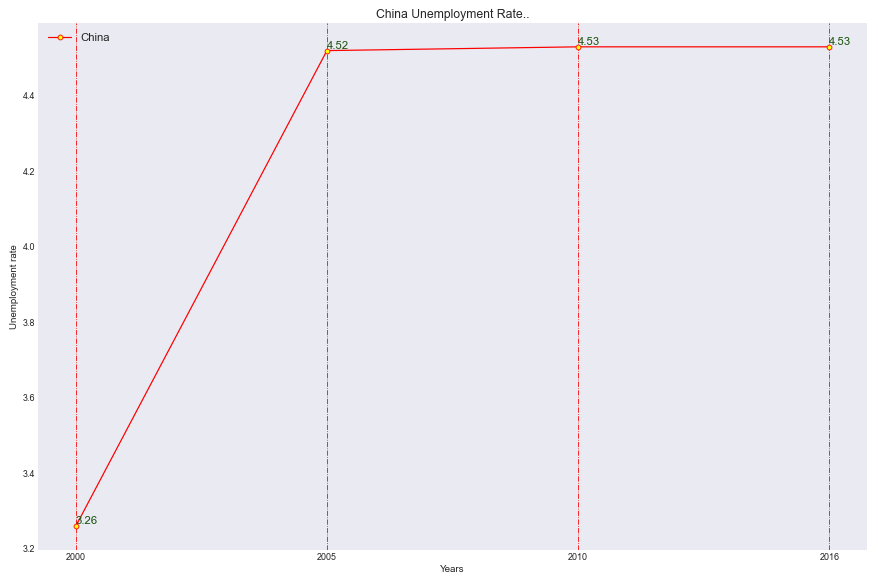

In [640]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_China_Unemployment.index, comparing_China_Unemployment.values,'-o',color = "red",markerfacecolor = "yellow",  label='China')
for x, y in zip(comparing_China_Unemployment.index, comparing_China_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#18540C', 'size':14})

plt.title('China Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper left")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'red')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : China Unemployment rate Increased 1.27 in 16 years ..

#### Exploring more details ..

In [644]:
df_Unemployment["China"].describe()

count    27.000000
mean      3.746667
std       1.091696
min       0.000000
25%       3.175000
50%       4.350000
75%       4.560000
max       4.720000
Name: China, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Afghanistan

<IPython.core.display.Javascript object>


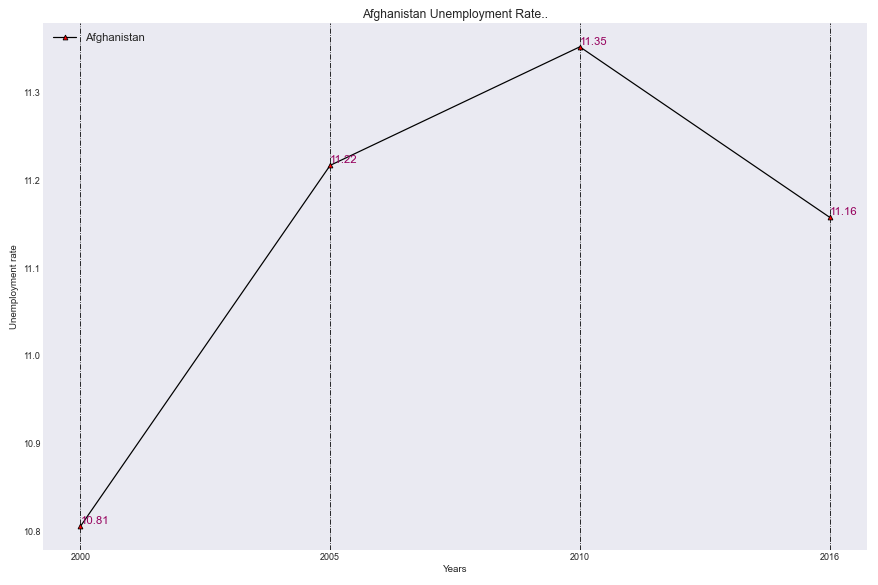

In [641]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_Afghanistan_Unemployment.index, comparing_Afghanistan_Unemployment.values,'-^',color = "black",markerfacecolor = "red" , label='Afghanistan')
for x, y in zip(comparing_Afghanistan_Unemployment.index, comparing_Afghanistan_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#96005d', 'size':14})

plt.title('Afghanistan Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper left")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'black')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Afghanistan Unemployment rate Increased 0.35 in 16 years ..

#### Exploring more details ..

In [647]:
df_Unemployment["Afghanistan"].describe()

count    27.000000
mean     10.623815
std       2.133948
min       0.000000
25%      10.807500
50%      11.093000
75%      11.186000
max      11.352000
Name: Afghanistan, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### United States

<IPython.core.display.Javascript object>


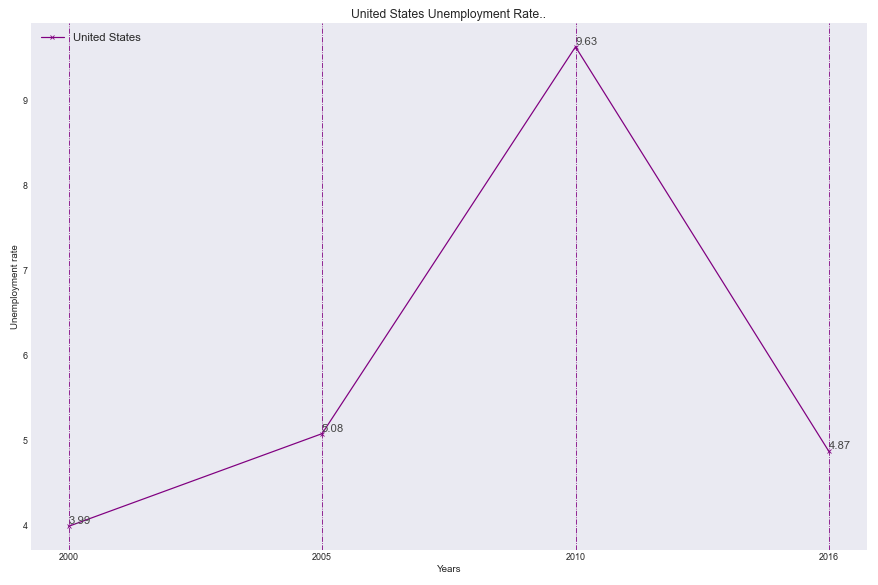

In [642]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_USA_Unemployment.index, comparing_USA_Unemployment.values,'-x',color = "purple",markerfacecolor = "purple" , label='United States')
for x, y in zip(comparing_USA_Unemployment.index, comparing_USA_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#474747', 'size':14})
    
plt.title('United States Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper left")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = 'purple')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : USA Unemployment rate Increased 0.88 in 16 years ..

#### Exploring more details ..

In [646]:
df_Unemployment["United States"].describe()

count    27.000000
mean      5.846667
std       1.930992
min       0.000000
25%       4.800000
50%       5.650000
75%       6.850000
max       9.630000
Name: United States, dtype: float64

   ### ----------------------------------------------------------------------------------------------- #
### Japan

<IPython.core.display.Javascript object>


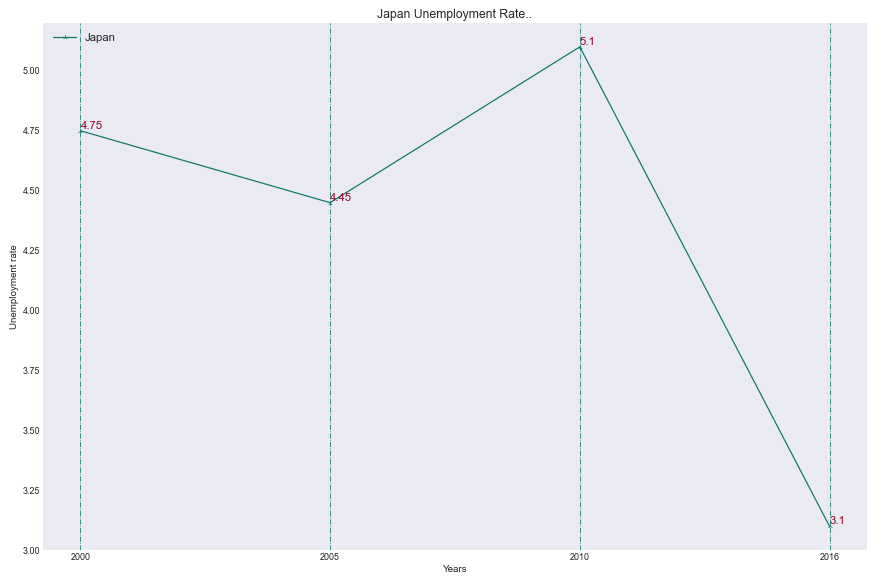

In [643]:
plt.figure(figsize=(15,10),dpi= 65)
plt.plot(comparing_Japan_Unemployment.index, comparing_Japan_Unemployment.values,'-2',color = "#0e786c",markerfacecolor = "gray",  label='Japan')
for x, y in zip(comparing_Japan_Unemployment.index, comparing_Japan_Unemployment.values):
    t = plt.text(x, y,round(y, 2), verticalalignment='top' if y < 0 else 'bottom', 
                 fontdict={'color':'#940025', 'size':14})
plt.title('Japan Unemployment Rate..',fontsize=15)
plt.xlabel("Years")
plt.ylabel("Unemployment rate")
plt.legend(fontsize=14,loc= "upper left")
plt.grid(axis = 'x', linestyle='dashdot', alpha=1,color = '#0e786c')
plt.tight_layout()
plt.show()

#### Understanding the Chart ..

#### As we can see from chart that : Japan Unemployment rate Increased 1.65 in 16 years ..

#### Exploring more details ..

In [645]:
df_Unemployment["Japan"].describe()

count    27.000000
mean      3.827778
std       1.198834
min       0.000000
25%       3.300000
50%       4.000000
75%       4.715000
max       5.390000
Name: Japan, dtype: float64

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='Question 5'></a>
### Question 5 : Which country has the most and least Unemployment Rate?

## Answer:

#### Calulating the countries that has the most and least Unemployment rate ... 

In [650]:
Unemployment = {}
for country in df_Unemployment.columns:
    Unemployment[df_Unemployment[country].mean()] = country

### Which country has the most Unemployment rate?

In [651]:
print("The country with the most Unemployment rate is {} with an average of --> {} ....".format(Unemployment[max(Unemployment.keys())],max(Unemployment.keys())))

The country with the most Unemployment rate is North Macedonia with an average of --> 30.729629517037043 ....


### Which country has the least Unemployment rate?

In [653]:
print("The country with the least Unemployment Rate is {} with an average of --> {} ....".format(Unemployment[min(Unemployment.keys())],min(Unemployment.keys())))

The country with the least Unemployment Rate is Kosovo with an average of --> 0.0 ....


 ### ------------------------------------------------------------------------------------------------------------------------------------------------ ###


## Dependant Questions..

<a id='Question 6'></a>
### Question 6 : Does Unemployment rate have an effect on Murder rate ?

#### Highest country in unemployment rate is North Macedonia ... Lets's investigate it ...

##### Macedonia Unemployment rate ..

In [673]:
macdonia_Unemployment = df_Unemployment["North Macedonia"]

In [674]:
macdonia_Unemployment.mean()

30.729629517037043

##### Macedonia Murder rate ..

In [675]:
macdonia_Murder = murder_ratio["North Macedonia"]

In [676]:
macdonia_Murder.mean()

103.1156044669988

#### Lets visualize it and see ...

<IPython.core.display.Javascript object>


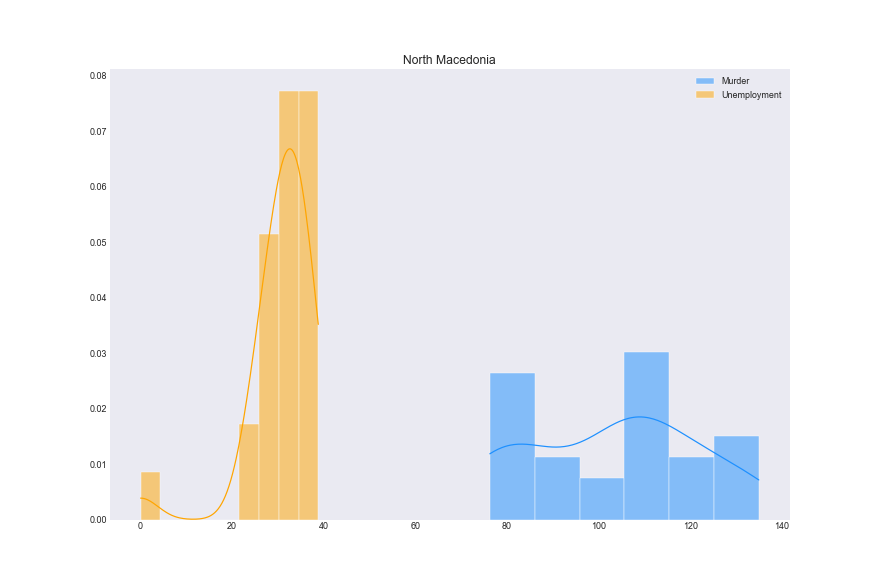

In [691]:
plt.figure(figsize=(15,10), dpi= 65)
sns.histplot(macdonia_Murder.values, color="dodgerblue", label="Murder", kde=True,stat="density", linewidth=0.5)
sns.histplot(macdonia_Unemployment.values, color="orange", label="Unemployment", kde=True,stat="density", linewidth=0.5)
# Decoration
plt.title('North Macedonia', fontsize=15)
plt.ylabel("")
plt.legend()
plt.show()

#### Answer :

#### As we can see That the increase in Unemployent doesnt effect the Murder rate...

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='Question 7'></a>
### Question 7 : Does increase in Income rate will lead to decrease the Murder rate ?

#### Highest country in Income rate is Luxembourg ... Lets's investigate it ...

##### Luxembourg  Income rate ..

In [693]:
income_Luxembourg = df_Income.Luxembourg

In [705]:
income_Luxembourg.mean()

95451.85185185185

##### Luxembourg  Murder rate ..

In [692]:
murder_Luxembourg = df_Murder.Luxembourg

In [704]:
murder_Luxembourg.mean()

6.7059259259259285

#### Lets visualize it and see ...

<IPython.core.display.Javascript object>


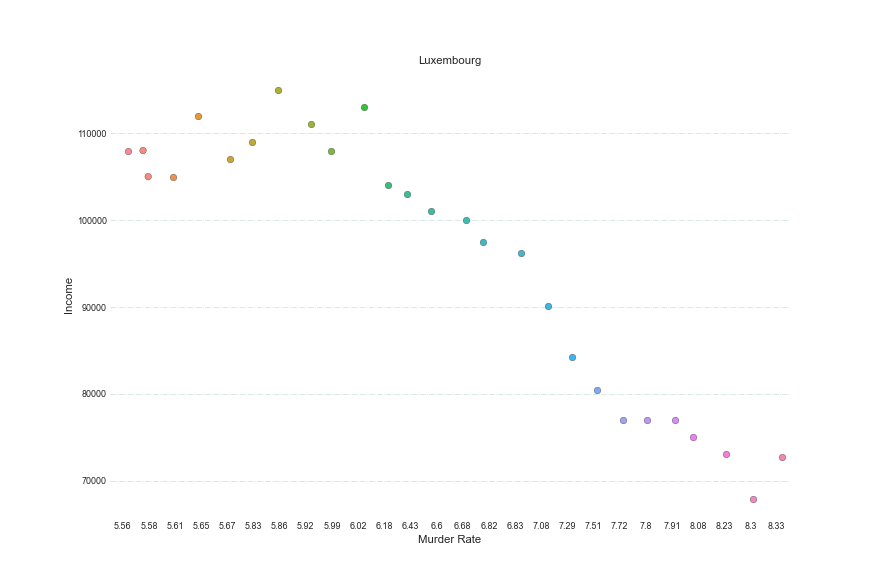

In [729]:
# Plot
fig, ax = plt.subplots(figsize=(15,10), dpi= 65)    
sns.stripplot(x=murder_Luxembourg, y= income_Luxembourg, jitter=0.25, size=8, ax=ax, linewidth=.5)
# Decorations
plt.title('Luxembourg', fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.xlabel("Murder Rate", fontsize=14)
plt.grid(axis = 'y', linestyle='dashdot', alpha=0.2,color = '#0e786c')
plt.show()

#### Answer :

#### As we can see from the chart that decreasing the income rate increase the murder rate ,  like when the income was less than \\$70k the murder rate was 8.3 which is high rate .. But when the income increased to more than 100k the murder rate decreased by 2.74 ...

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='Question 8'></a>
### Question 8 : Does the increase in Population effect the Unemployment Rate ?

#### Highest country in Population is China  ... Lets's investigate it ...

##### China  Population ..

In [752]:
Population_China = df_Population.China

In [731]:
Population_China.mean()

1308888888.8888888

##### China  Unemployment rate ..

In [753]:
Unemployment_China = df_Unemployment.China

In [733]:
Unemployment_China.mean()

3.746666669925926

#### Lets visualize it and see ...

<IPython.core.display.Javascript object>


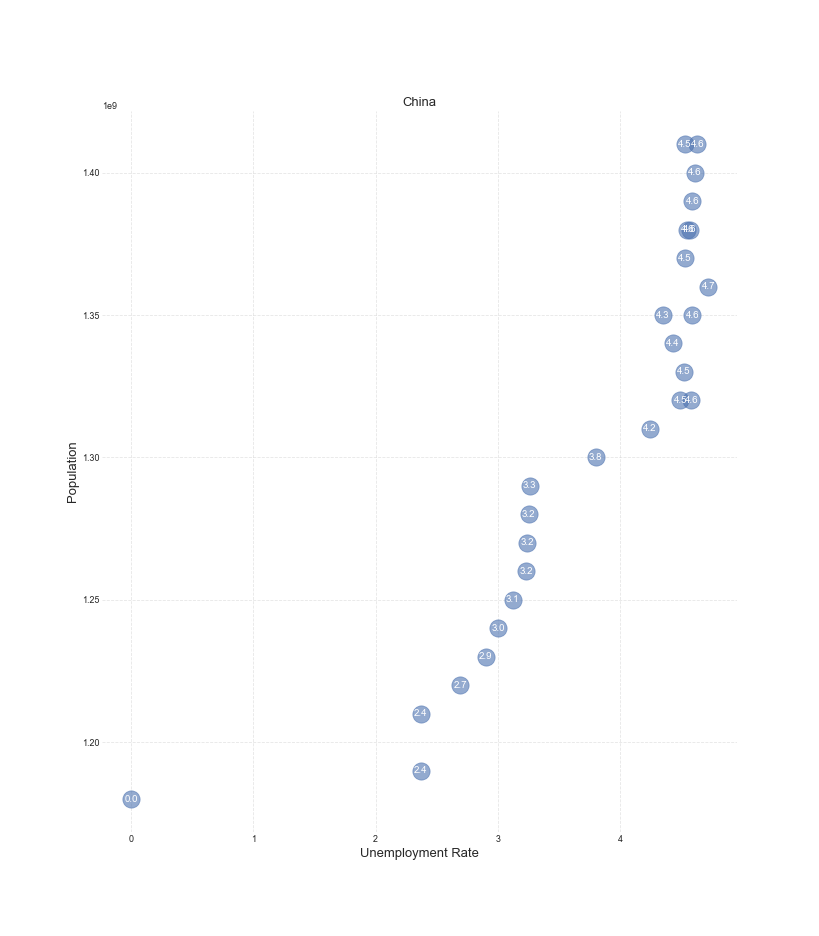

In [762]:
plt.figure(figsize=(14,16), dpi= 65)
plt.scatter(Unemployment_China, Population_China, s=450, alpha=.6)
for x, y, tex in zip(Unemployment_China, Population_China, Unemployment_China):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# plt.yticks(Unemployment_China.index)
plt.title('China', fontdict={'size':16})
plt.xlabel('Unemployment Rate',fontsize=16)
plt.ylabel("Population",fontsize=16)
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()

#### Answer :

#### As we can see from the chart that the increase in Population increases the Unemployment rate ..  Then the answer will be Yes the unemployment rate increases by increasing the population...

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='Question 9'></a>
### Question 9: Does the increase in Murder rate effect the Economy?

#### Highest country in Murder Rate is Brazil  ... Lets's investigate it ...

##### Brazil  Murder Rate ..

In [763]:
Murder_Brazil = df_Murder.Brazil

In [764]:
Murder_Brazil.mean()

52555.555555555555

##### Brazil GDP rate ..

In [765]:
GDP_Brazil = df_GDP.Brazil

In [766]:
GDP_Brazil.mean()

2.281282081444444

#### Lets visualize it and see ...

<IPython.core.display.Javascript object>


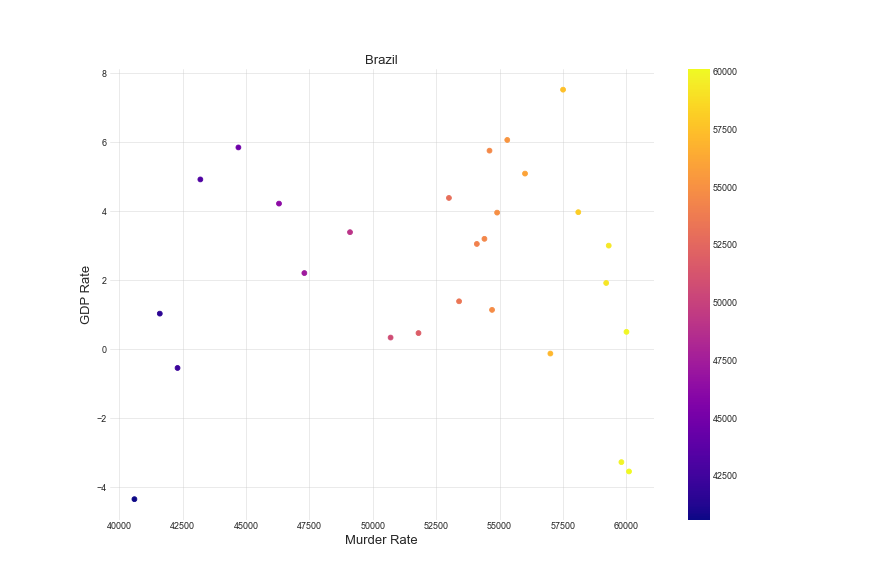

In [790]:
# Draw Plot
plt.figure(figsize=(15,10), dpi= 65)
plt.scatter(Murder_Brazil, GDP_Brazil, c=Murder_Brazil, cmap='plasma')
plt.colorbar()
plt.title('Brazil',fontsize=16)
plt.xlabel('Murder Rate',fontsize=16)
plt.ylabel('GDP Rate',fontsize=16)
plt.grid(alpha=0.5)
plt.show()

#### Answer :

#### As we can see from the chart that the increase in Murder rate doesnt Effect the Economy , As we can see that when Barzil had an 60000 murder rate its economy was increasing by a rate of 7.8 ..

## -------------------------------------------------------------------------------------------------------------------------- ###

<a id='conclusions'></a>
## Conclusions

> We have investigated 5 indicators Unemplyment rate , Crime rate , GDP growth rate , Income Rate , Population rate .. 

> We compared countries and seen who has the most and least value of all the 5 indicators ...

> Which country has the most and least Murder rate?
>> The country with the most Murder Rate is Brazil with an average of --> 52555.555555555555 ....

>> The country with the Least Murder Rate is Andorra with an average of --> 0.5137037037037038 ....

> Which is the most and least country in Population?
>> The country with the most Population Rate is China with an average of --> 1308888888.8888888 ....

>> The country with the most Population Rate is Holy See with an average of --> 785.5925925925926 ....

> Which country has the most and least GDP Rate?
>> The country with the most economy Growth is Equatorial Guinea with an average of --> 19.974110408814813 ....

>> The country with the least Growth is Ukraine with an average of --> -1.8408876753703698 ....

> Which country has the most and least Income Rate?
>> The country with the most Income Rate is Luxembourg with an average of --> \\$95451.85185185185  ....

>>The country with the least Income Rate is Somalia with an average of --> \\$732.1481481481482 ....

> Which country has the most and least Unemployment Rate?
>> The country with the most Unemployment rate is North Macedonia with an average of --> 30.729629517037043 ....

>> The country with the least Unemployment Rate is Kosovo with an average of --> 0.0 ....

> Does Unemployment rate have an effect on Murder rate ?
>> No, the increase in Unemployent doesnt effect the Murder rate

> Does increase in Income rate will lead to decrease the Murder rate ?
>> Yes, Increasing the income rate will decrease the murder rate ..

> Does the increase in Population effect the Unemployment Rate ?
>> Yes, Increasing in Population will increase the Unemployment rate ..

> Does the increase in Murder rate effect the Economy?
>> No, Increasing in Murder rate doesnt Effect the Economy ..


<a id='limitations'></a>
## Limitations

> There Was no nan limitaions since the years doesnt depend on each others .. So changing NaN Values to 0 didnt effect the analysis ..

> But there was a limations in years , Beaceause Not all data have the same amount years , Like the Unemployment data and GDP data both start from 1950 , but for Population data it starts from 1850 , same for Income Data it starts from 1800, But Murder Data starts from 1990 to 2016 , So i had to drop all the other years during visualization and keep years from 1990 to 2016 ,Inorder to be able to Visualize datas Evenly then compare them to each other... 